<h1><center>Data Processing- Summer 2020</h1></center><h3><center>Assignment 3</h3></center>


In [1]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

### 1. Task 1

(0.1) We will extract features from each channel of each of the data files of Test set 2. The features will be statistical time-domain features typically used in bearing monitoring. The six features to extract are RMS, Variance, Skewness, Kurtosis, Shape factor and Crest factor, defined in Table 1 of the reference, and reproduced below: A Review of Feature Extraction Methods in Vibration-Based Condition Monitoring and Its Application for Degradation Trend Estimation of Low-Speed Slew Bearing https://www.mdpi.com/2075-1702/5/4/21 Use σ=1 in the formulas for variance, skewness and kurtosis 

Compute the six features for each file of Test set 2, and plot them as functions of time for each of the channels. Compute and plot the histograms of the vibration signals for each data file. 

Describe your observations.

    From the figure, we can see that the six characteristics, with the change of the time interval, basically tend to stabilize at the beginning, but when the end is reached, for the case of Broken imminent, that is, when the useful life reaches the end, the data will all oscillate, and the amplitude is very large compared to the previous data

How similar are the plots of the different channels?

    For the 6-character time interval chart, the growth trend of their changes with time between different tracks is basically the same, but there will be a slight difference at the end;
    The distribution density of the points presented by the RMS bar chart is mostly between 0 and 0.1, and the distribution density of the points presented by the Variance bar chart is mostly around 0.01. The distribution of the points presented by the Skewness bar chart The density is mostly around 0, and the formed image is basically close to the shape of normal distribution. The distribution density of the points represented by the Kurtosis bar graph is mostly near 0, and the distribution density of the points represented by the Shape Factor bar graph is mostly in the interval [1.2, 1.3]. The distribution density of the points presented by the Crest Factor bar graph is mostly like normal distribution.

Is there any evidence in the plots for which features are the most useful for the RUL prediction task? 

    Skewness,Kurtosis may be more useful for us to predict the remaining useful life later, because from their time interval variation graphs, the graphs of these two features have a smaller amplitude of variation compared to the other four, which means that the data flow tends to be stable, there is no data marginalization, which can effectively reduce the error when we build and train the model later, and stable data like this has the advantage of avoiding underfitting and overfitting.


Is the normalization of the data useful?

    Normalization of the data is necessary, because it can further improve the accuracy of our model building and training later, thereby improving the accuracy of our model's prediction. At the same time, normalization of the data also helps our model convergence speed. Because the data is mapped to the range of 0 to 1 for processing, that is, the feature is turned into a digital signal, which can be more convenient and fast in calculation and processing.

In [2]:

def compute(folder_name,window,folder_path):
    rms=[]
    var=[]
    sk=[]
    ku=[]
    sf=[]
    cf=[]
    for file in folder_name:
        temp_pd = pd.read_table(folder_path+file, names=['b1', 'b2', 'b3', 'b4'])
        b1=temp_pd['b1']
        b2=temp_pd['b2']
        b3=temp_pd['b3']
        b4=temp_pd['b4']
        loop=1
        if window==0.1:
            n=len(b3)//10
            loop=10
        elif window==0.5:
            n=len(b3)//2
            loop=2
        else:
            n=len(b3)
            loop=1
        index=list(range(0,len(b3)+loop,n))
        for i in range(loop):
            m1=b1[index[i]:index[i+1]].mean()
            m2=b2[index[i]:index[i+1]].mean()
            m3=b3[index[i]:index[i+1]].mean()
            m4=b4[index[i]:index[i+1]].mean()
            
            rms1=((b1[index[i]:index[i+1]]**2).sum()/n)**(1/2)
            rms2=((b2[index[i]:index[i+1]]**2).sum()/n)**(1/2)
            rms3=((b3[index[i]:index[i+1]]**2).sum()/n)**(1/2)
            rms4=((b4[index[i]:index[i+1]]**2).sum()/n)**(1/2)
            
            var1=((b1[index[i]:index[i+1]]-m1)**2).sum()/(n-1)
            var2=((b2[index[i]:index[i+1]]-m2)**2).sum()/(n-1)
            var3=((b3[index[i]:index[i+1]]-m3)**2).sum()/(n-1)
            var4=((b4[index[i]:index[i+1]]-m4)**2).sum()/(n-1)
            
            sk1=((b1[index[i]:index[i+1]]-m1)**3).sum()/(n-1)
            sk2=((b2[index[i]:index[i+1]]-m2)**3).sum()/(n-1)
            sk3=((b3[index[i]:index[i+1]]-m3)**3).sum()/(n-1)
            sk4=((b4[index[i]:index[i+1]]-m4)**3).sum()/(n-1)
            
            ku1=((b1[index[i]:index[i+1]]-m1)**4).sum()/(n-1)
            ku2=((b2[index[i]:index[i+1]]-m2)**4).sum()/(n-1)
            ku3=((b3[index[i]:index[i+1]]-m3)**4).sum()/(n-1)
            ku4=((b4[index[i]:index[i+1]]-m4)**4).sum()/(n-1)
            
            sf1=rms1/(b1[index[i]:index[i+1]].abs().sum()/n)
            sf2=rms2/(b2[index[i]:index[i+1]].abs().sum()/n)
            sf3=rms3/(b3[index[i]:index[i+1]].abs().sum()/n)
            sf4=rms4/(b4[index[i]:index[i+1]].abs().sum()/n)
            
            cf1=(b1[index[i]:index[i+1]].abs().max())/rms1
            cf2=(b2[index[i]:index[i+1]].abs().max())/rms2
            cf3=(b3[index[i]:index[i+1]].abs().max())/rms3
            cf4=(b4[index[i]:index[i+1]].abs().max())/rms4
            rms.append([rms1,rms2,rms3,rms4])
            var.append([var1,var2,var3,var4])
            sk.append([sk1,sk2,sk3,sk4])
            ku.append([ku1,ku2,ku3,ku4])
            sf.append([sf1,sf2,sf3,sf4])
            cf.append([cf1,cf2,cf3,cf4])
    return rms,var,sk,ku,sf,cf

In [3]:
f1 = os.listdir('1st_test')
f2 = os.listdir('2nd_test')
rms1,var1,sk1,ku1,sf1,cf1=compute(f1,1, '1st_test\\')
rms2,var2,sk2,ku2,sf2,cf2=compute(f2,1, '2nd_test\\')

In [4]:
rms1,var1,sk1,ku1,sf1,cf1=np.array(rms1),np.array(var1),np.array(sk1),np.array(ku1),np.array(sf1),np.array(cf1)
rms2,var2,sk2,ku2,sf2,cf2=np.array(rms2),np.array(var2),np.array(sk2),np.array(ku2),np.array(sf2),np.array(cf2)

In [5]:
def plot_time_each_channel(rms, var, sk, ku, sf, cf, ch_index,ch):
    legend=[['channel 1'],['channel 2'],['channel 3'],['channel 4']]
    time = list(range(len(rms)))
    plt.figure(figsize=(20, 10))
    #2raws, 3 columns, current is 1
    plt.subplot(2,3,1)
    plt.plot(time, rms[:,ch_index])
    plt.xlabel('Rul time interval (seconds)')
    plt.ylabel("RMS")
    plt.title('Plot RMS as functions of time for channel '+ch)
    plt.legend(legend[ch_index])
    
    plt.subplot(2,3,2)
    plt.plot(time, var[:,ch_index])
    plt.xlabel('Rul time interval (seconds)')
    plt.ylabel("Var")
    plt.title('Plot Var as functions of time for channel '+ch)
    plt.legend(legend[ch_index])
    
    plt.subplot(233)
    plt.plot(time, sk[:,ch_index])
    plt.xlabel('Rul time interval (seconds)')
    plt.ylabel("Skewness")
    plt.title('Plot Skewness as functions of time for channel '+ch)
    plt.legend(legend[ch_index])
    
    plt.subplot(234)
    plt.plot(time, ku[:,ch_index])
    plt.xlabel('Rul time interval (seconds)')
    plt.ylabel("Kurtosis")
    plt.title('Plot Kurtosis as functions of time for channel '+ch)
    plt.legend(legend[ch_index])
    
    plt.subplot(235)
    plt.plot(time, sf[:,ch_index])
    plt.xlabel('Rul time interval (seconds)')
    plt.ylabel("Shape factor")
    plt.title('Plot Shape factor as functions of time for channel '+ch)
    plt.legend(legend[ch_index])
    
    plt.subplot(236)
    plt.plot(time, cf[:,ch_index])
    plt.xlabel('Rul time interval (seconds)')
    plt.ylabel("Crest factor")
    plt.title('Plot Crest factor as functions of time for channel '+ch)
    plt.legend(legend[ch_index])
    plt.show()

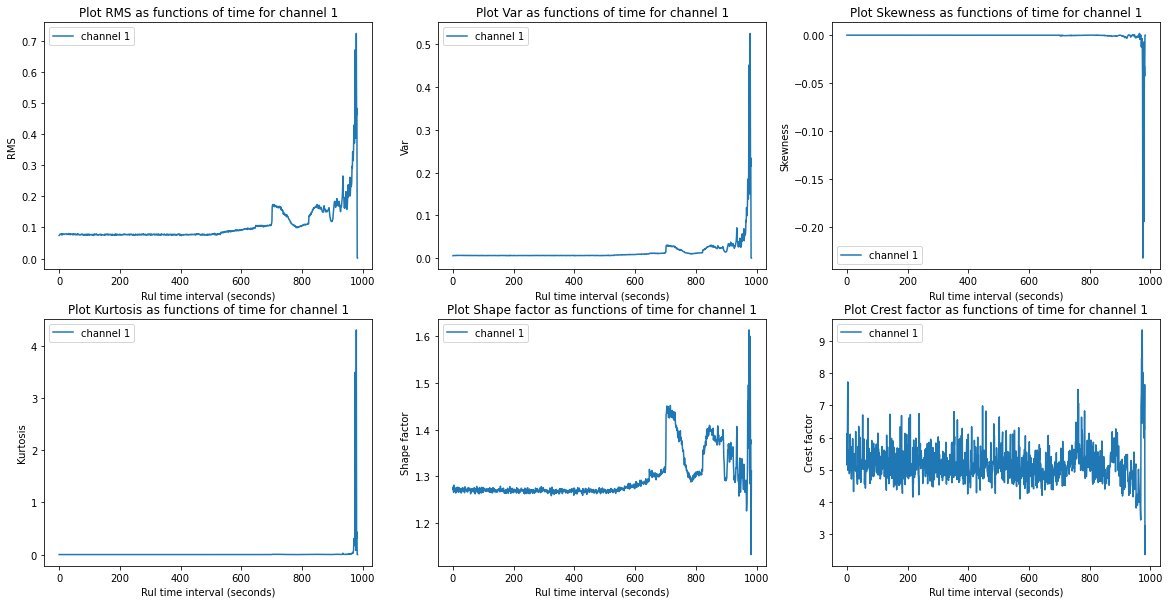

In [6]:
plot_time_each_channel(rms2,var2,sk2,ku2,sf2,cf2,0,'1')

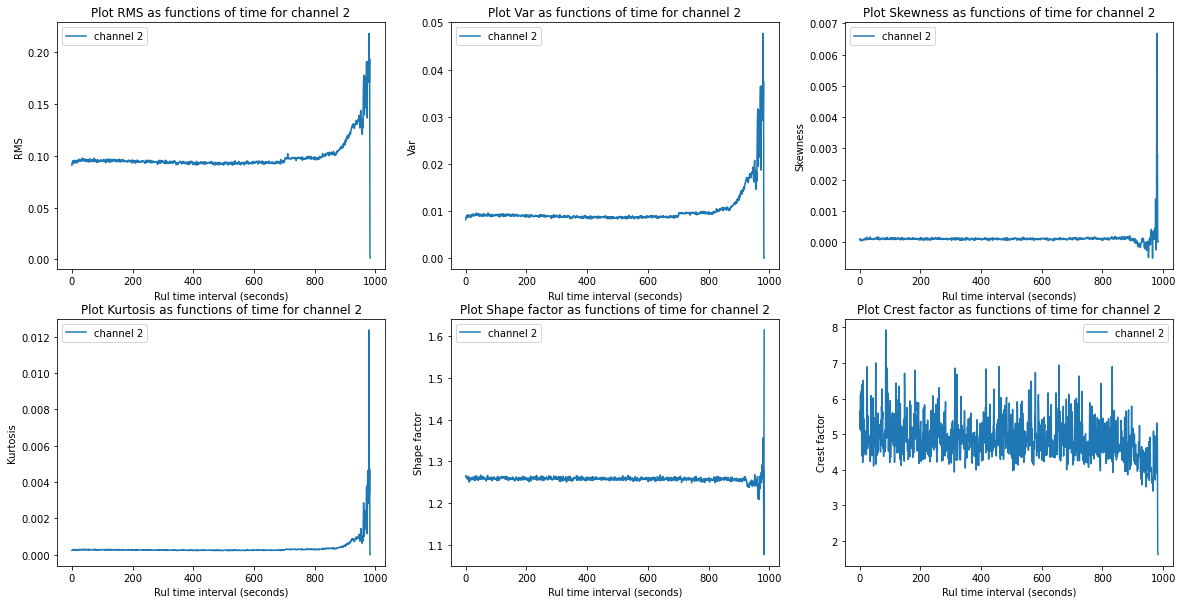

In [7]:
plot_time_each_channel(rms2,var2,sk2,ku2,sf2,cf2,1,'2')

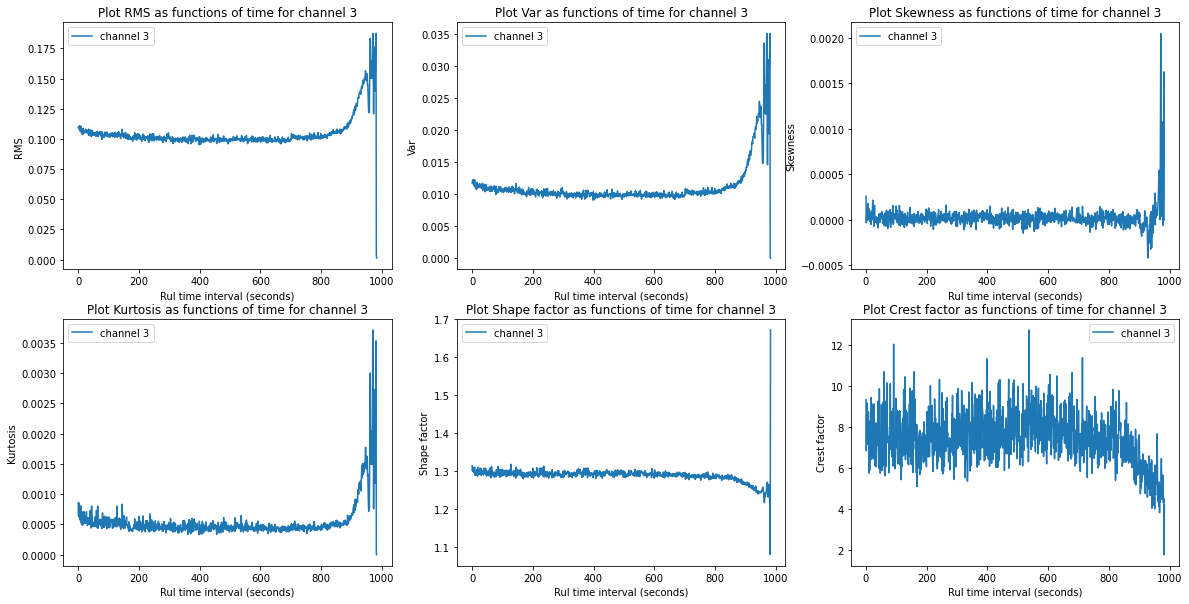

In [8]:
plot_time_each_channel(rms2,var2,sk2,ku2,sf2,cf2,2,'3')

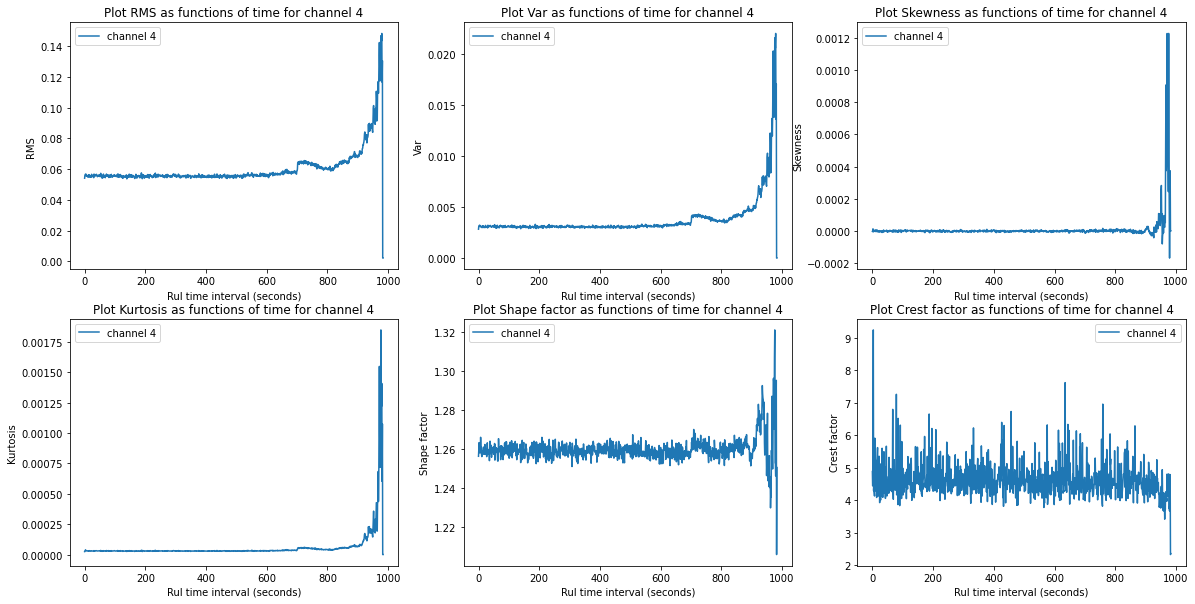

In [9]:
plot_time_each_channel(rms2,var2,sk2,ku2,sf2,cf2,3,'4')

In [10]:
def plot_hist(rms, var, sk, ku, sf, cf):
    legend = ['channel 1', 'channel 2', 'channel 3', 'channel 4']
    plt.figure(figsize=(20, 10))
    # 2raws, 3 columns, current is 1
    plt.subplot(2, 3, 1)
    plt.hist(rms)
    plt.ylabel("RMS")
    plt.title('Plot RMS as histograms of the vibration signals')
    plt.legend(legend)

    plt.subplot(2, 3, 2)
    plt.hist(var)
    plt.ylabel("Var")
    plt.title('Plot Var as histograms of the vibration signals')
    plt.legend(legend)

    plt.subplot(233)
    plt.hist(sk)
    plt.ylabel("Skewness")
    plt.title('Plot Skewness as histograms of the vibration signals')
    plt.legend(legend)

    plt.subplot(234)
    plt.hist(ku)
    plt.ylabel("Kurtosis")
    plt.title('Plot Kurtosis as histograms of the vibration signals')
    plt.legend(legend)

    plt.subplot(235)
    plt.hist(sf)
    plt.ylabel("Shape factor")
    plt.title('Plot Shape factor as histograms of the vibration signals')
    plt.legend(legend)

    plt.subplot(236)
    plt.hist(cf)
    plt.ylabel("Crest factor")
    plt.title('Plot Crest factor as histograms of the vibration signals')
    plt.legend(legend)
    plt.show()

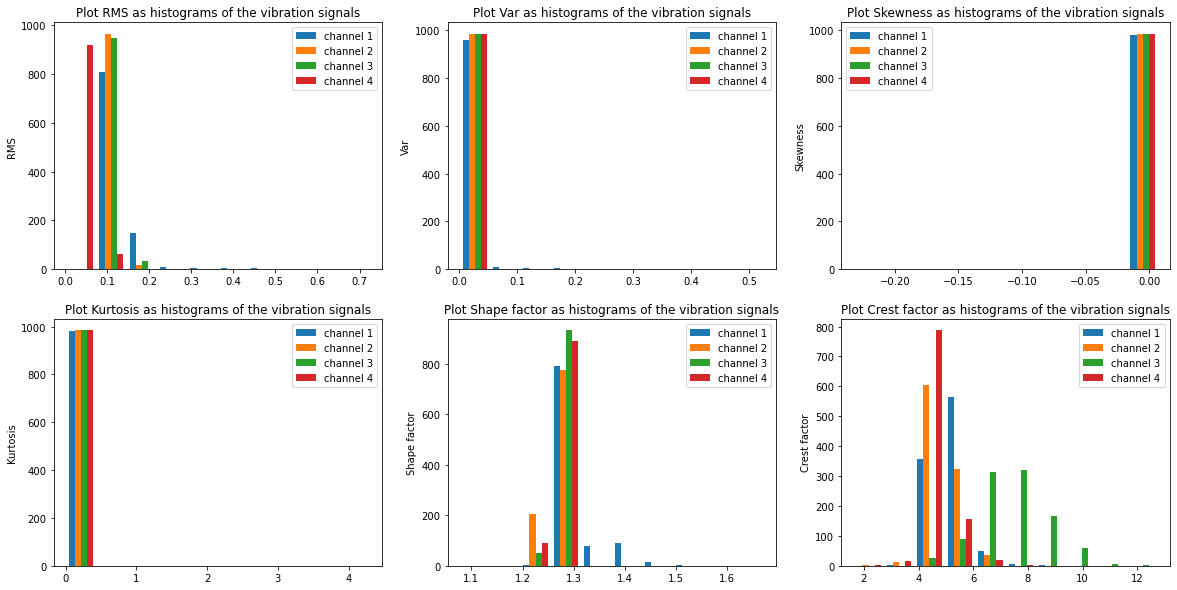

In [11]:
plot_hist(rms2,var2,sk2,ku2,sf2,cf2)

### 2. Task 2

Choose a method and train a model to predict the remaining useful life (RUL) of the bearing. In Test set 2, there are four channels, with channel 1 corresponding to the bearing that failed (bearing 1). 

In the regression, a data point is the set of features from each data file. 

Experiment with different feature choices: features from channel 1 only, features from all four channels, and different subsets of the six features. 

Evaluate the performance of the regression model on the training data using the mean-squared- error metric. 

Evaluate the performance of the model on test data from Test set 1.

Idea:

    Preparing the training data and label
    Since we want to detect a failure as early as possible, so we need to mark label as 'Broken' corresponds to the time interval earlier.
    For describe file, 'at the end of the test-to-failure experiment, outer race failure occurred in bearing 1', so the Bearing_1 channel of last file in 2nd_test folder is Broken label  and other data as 'Working' on the theoretically.

    Because the ultimate goal of our experiment is to be able to predict the time of failure earlier and thus predict the remaining usable life. To this end, we label the training data according to time, and these time intervals are matched to the remaining available life in units of days, which is used as a label to train and create the model. For example, there are a total of 984 files in the second folder, and the Recording Duration: February 12, 2004 10:32:39 to February 19, 2004 06:22:39. From this point of view, there are a total of 8 days, Among them, February 12 is the farthest from the failure, so we can label it for 7 days, and the range of analogy labels is between 0 and 7.

    At the same time, we adopt a random forest regression model for modeling. Because the random forest regression model can handle many high-dimensional data, it has advantages in the face of multiple features, and the model has a strong generalization ability when creating random forests. And the training speed is faster, and can balance the error.

    For the created model, we will score the MSE score, because the MSE score can evaluate the degree of data change. The smaller the MSE value, the better the experimental data described by the prediction model has better accuracy.

    Finally, we will take values and split the data at the end of the experiment, then draw the overall performance graph of MSE for each experiment, and observe the trend of each graph to draw a conclusion.
    
Conclusion:
    
    RMS, Variance, Skewness, Kurtosis model prediction is significantly better than Shape factor and Crest factor. 
    For the first channel, the model's prediction is the worst for Crest factor, because its MSE score is as high as 74.15, and RMS's prediction is best because his MSE score is only 55.

    For selecting the first two channels, the model can predict the RMS, Variance and Kurtosis attribute very well, but it cannot predict the Crest factor attribute very well because its MSE score is the highest, and the model accuracy is not as high as the former (51%<88%) .

    For selecting the first three channels, the model can still predict RMS, Variance very well, but it is not sensitive to Crest factor attributes.

    If all channels are selected, the prediction of RMS and variance attributes is still considerable. On the other hand, as the number of tracks we select increases, as the time interval increases, the jitter amplitude of feature scores increases significantly, because the aliasing of graphics increases, which means that some data has been significantly marginalized .
    
    

In [12]:
def plot_time(rms, var, sk, ku, sf, cf, ch_index,ch):
    if ch_index==1:
        legend=['channel 1']
    elif ch_index==2:
        legend=['channel 1','channel 2']
    elif ch_index==3:
        legend=['channel 1','channel 2','channel 3']
    else:
        legend=['channel 1','channel 2','channel 3','channel 4']
    time = list(range(len(rms)))
    plt.figure(figsize=(20, 10))
    #3 raws, 1 columns, current is 1
    plt.subplot(2,3,1)
    plt.plot(time, rms[:,:ch_index])
    plt.xlabel('Rul time interval (seconds)')
    plt.ylabel("RMS")
    plt.title('Plot RMS as functions of time for channel '+ch)
    plt.legend(legend)
    
    plt.subplot(2,3,2)
    plt.plot(time, var[:,:ch_index])
    plt.xlabel('Rul time interval (seconds)')
    plt.ylabel("Var")
    plt.title('Plot Var as functions of time for channel '+ch)
    plt.legend(legend)
    
    plt.subplot(233)
    plt.plot(time, sk[:,:ch_index])
    plt.xlabel('Rul time interval (seconds)')
    plt.ylabel("Skewness")
    plt.title('Plot Skewness as functions of time for channel '+ch)
    plt.legend(legend)
    
    plt.subplot(234)
    plt.plot(time, ku[:,:ch_index])
    plt.xlabel('Rul time interval (seconds)')
    plt.ylabel("Kurtosis")
    plt.title('Plot Kurtosis as functions of time for channel '+ch)
    plt.legend(legend)
    
    plt.subplot(235)
    plt.plot(time, sf[:,:ch_index])
    plt.xlabel('Rul time interval (seconds)')
    plt.ylabel("Shape factor")
    plt.title('Plot Shape factor as functions of time for channel '+ch)
    plt.legend(legend)
    
    plt.subplot(236)
    plt.plot(time, cf[:,:ch_index])
    plt.xlabel('Rul time interval (seconds)')
    plt.ylabel("Crest factor")
    plt.title('Plot Crest factor as functions of time for channel '+ch)
    plt.legend(legend)
    plt.show()


In [13]:
def create_label(file_list, window):
    label = []
    if window == 0.1:
        n = 10
    elif window == 0.5:
        n = 2
    else:
        n = 1
    name = []
    for file in file_list:
        name.append(file[:10])
    name = np.array(name)
    for i in range(len(np.unique(name))):
        label += [i]*(n*len(name[name == np.unique(np.array(name))[::-1][i]]))
    return label

In [14]:
train_label_1s = create_label(f2, 1)
test_label_1s = create_label(f1, 1)

In [15]:
def model_build(train_list, test_list, train_label, test_label, ch_index, ch, windows):
    name = ['RMS', 'Variance', 'Skewness',
            'Kurtosis', 'Shape factor', 'Crest factor']
    mse_list = []
    for i in range(6):
        model = RandomForestRegressor(random_state=0)
        model.fit(train_list[i][:, :ch_index], train_label)
        prediction = model.predict(test_list[i][:, :ch_index])
        mse = mean_squared_error(test_label, prediction)
        print('The score of model training score is ', model.score(
            train_list[i][:, :ch_index], train_label))
        Str = 'Experiment with '+windows+' window, and feature ' + \
            name[i]+' from channel '+ch+', get MSE score is '+str(mse)
        print(Str)
        print('************************************************************************************************')
        mse_list.append(mse)
    plot_time(test_list[0], test_list[1], test_list[2],
              test_list[3], test_list[4], test_list[5], ch_index, ch)
    plot_hist(test_list[0][:, :ch_index], test_list[1][:, :ch_index], test_list[2]
              [:, :ch_index], test_list[3][:, :ch_index], test_list[4][:, :ch_index], test_list[5][:, :ch_index])
    return mse_list

In [16]:
train_list=[rms2,var2,sk2,ku2,sf2,cf2]
test_list=[rms1,var1,sk1,ku1,sf1,cf1]


The score of model training score is  0.9569323424979939
Experiment with 1s window, and feature RMS from channel 1, get MSE score is 55.89889842300557
************************************************************************************************
The score of model training score is  0.9550255718541257
Experiment with 1s window, and feature Variance from channel 1, get MSE score is 57.900103988868274
************************************************************************************************
The score of model training score is  0.7408081246500963
Experiment with 1s window, and feature Skewness from channel 1, get MSE score is 71.46549833097473
************************************************************************************************
The score of model training score is  0.8761396857997523
Experiment with 1s window, and feature Kurtosis from channel 1, get MSE score is 56.52380127925942
*****************************************************************************************

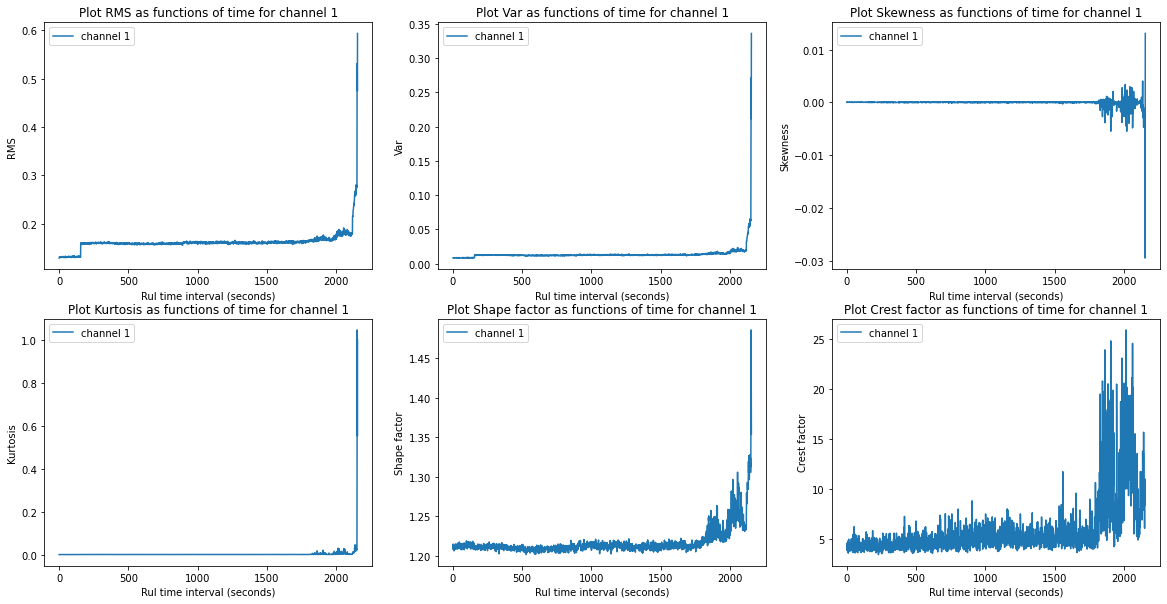

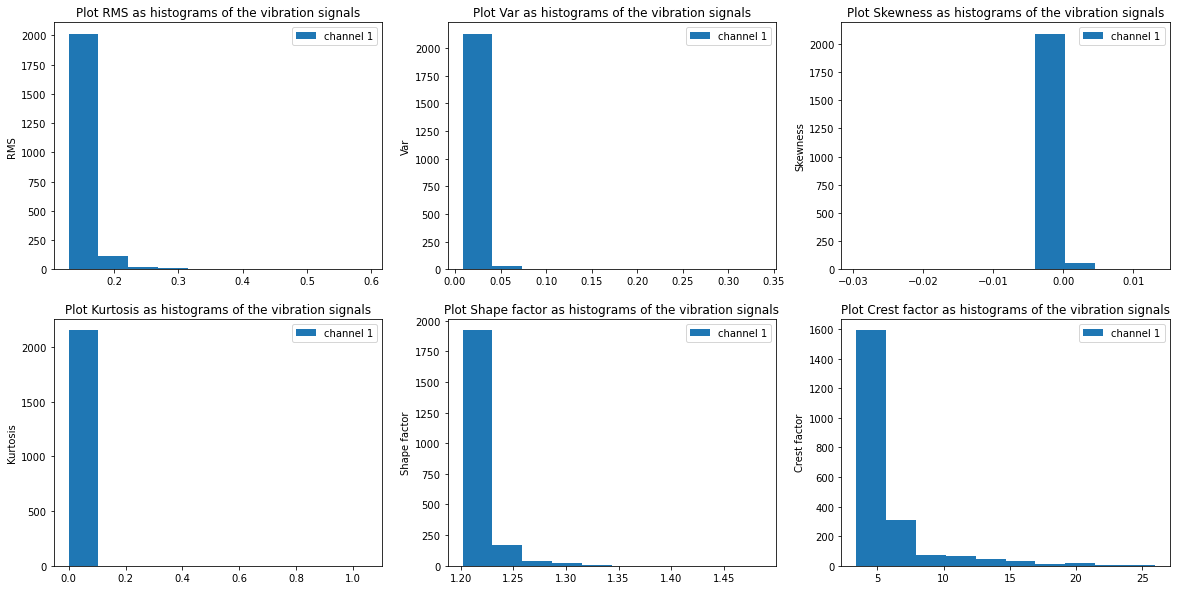

[55.89889842300557,
 57.900103988868274,
 71.46549833097473,
 56.52380127925942,
 55.225703432281996,
 74.15074216141002]

In [17]:
#use 1s window, and features from channel 1 only
model_build(train_list,test_list,train_label_1s,test_label_1s,1,'1','1s')

The score of model training score is  0.984702118527841
Experiment with 1s window, and feature RMS from channel 1,2, get MSE score is 50.30777365491651
************************************************************************************************
The score of model training score is  0.9849460425027103
Experiment with 1s window, and feature Variance from channel 1,2, get MSE score is 51.65917476808905
************************************************************************************************
The score of model training score is  0.9319343733970948
Experiment with 1s window, and feature Skewness from channel 1,2, get MSE score is 56.96805672541743
************************************************************************************************
The score of model training score is  0.9825796800306359
Experiment with 1s window, and feature Kurtosis from channel 1,2, get MSE score is 51.657425463821895
**********************************************************************************

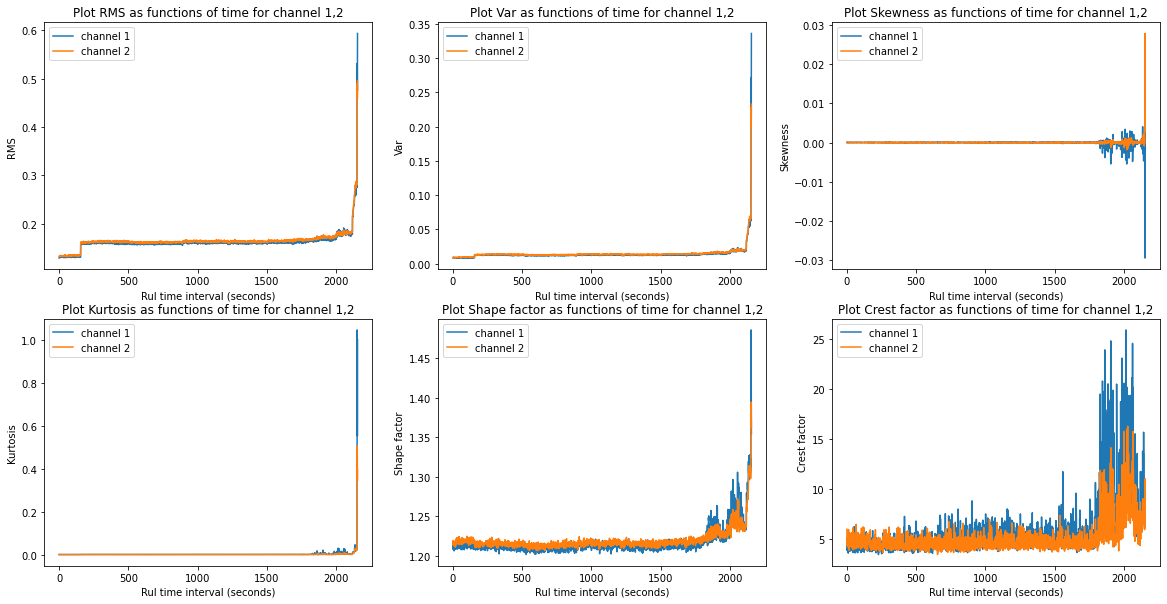

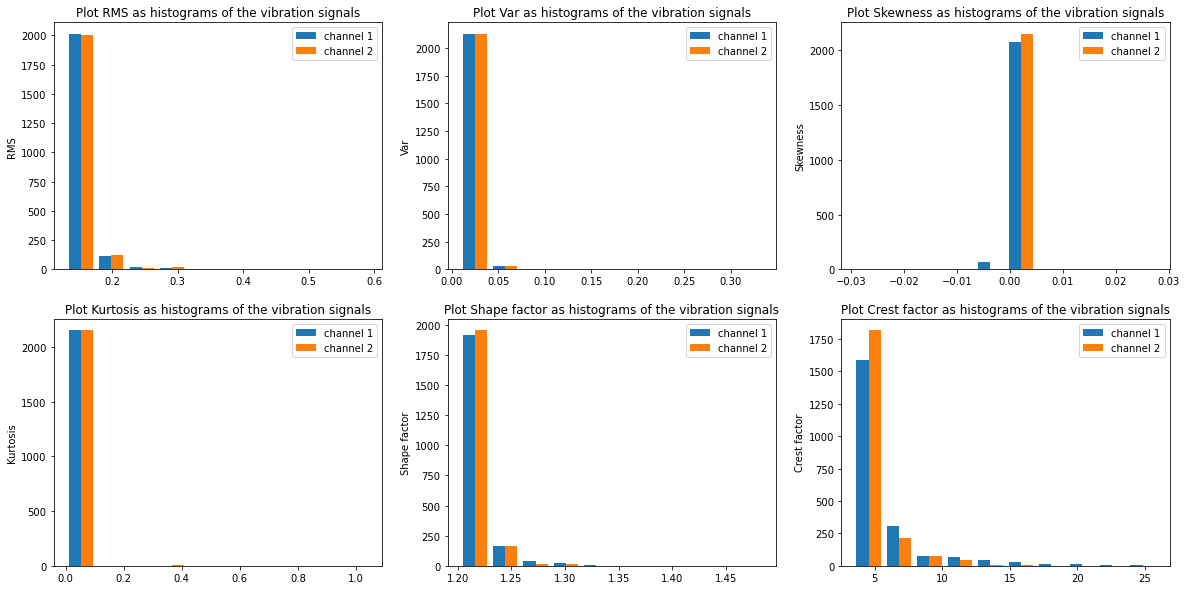

[50.30777365491651,
 51.65917476808905,
 56.96805672541743,
 51.657425463821895,
 52.5332918367347,
 88.57755273654915]

In [18]:
#use 1s window, and features from channel 1,2
model_build(train_list,test_list,train_label_1s,test_label_1s,2,'1,2','1s')

The score of model training score is  0.9915581236357266
Experiment with 1s window, and feature RMS from channel 1,2,3, get MSE score is 50.07201414656772
************************************************************************************************
The score of model training score is  0.9915391974134798
Experiment with 1s window, and feature Variance from channel 1,2,3, get MSE score is 50.67894294990724
************************************************************************************************
The score of model training score is  0.9375167531426789
Experiment with 1s window, and feature Skewness from channel 1,2,3, get MSE score is 58.09904628942486
************************************************************************************************
The score of model training score is  0.986060169479154
Experiment with 1s window, and feature Kurtosis from channel 1,2,3, get MSE score is 52.352434137291276
**************************************************************************

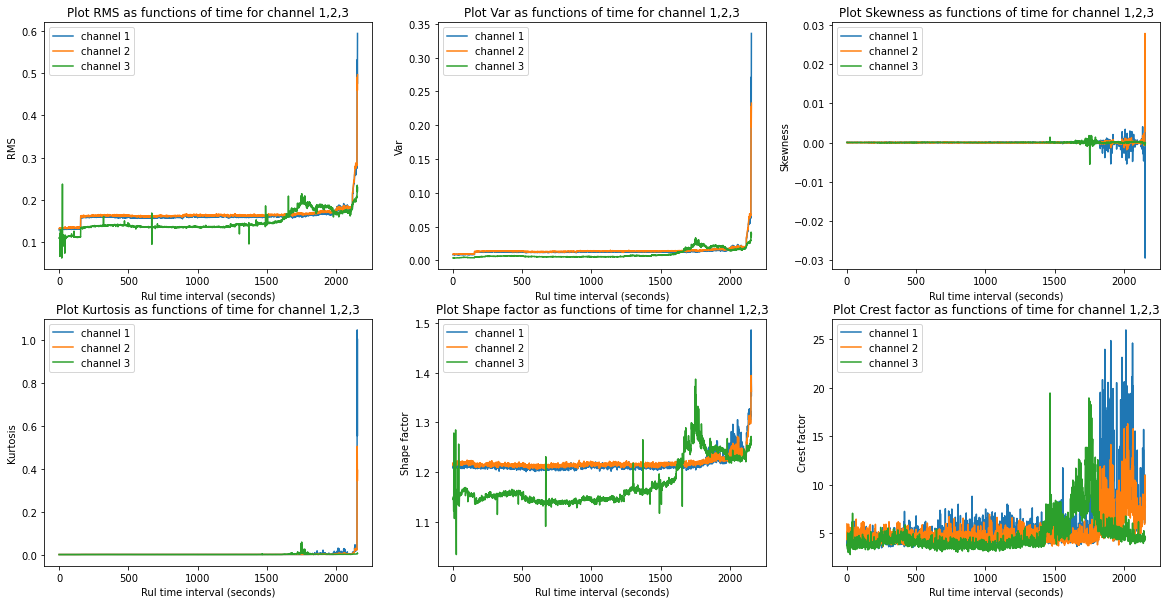

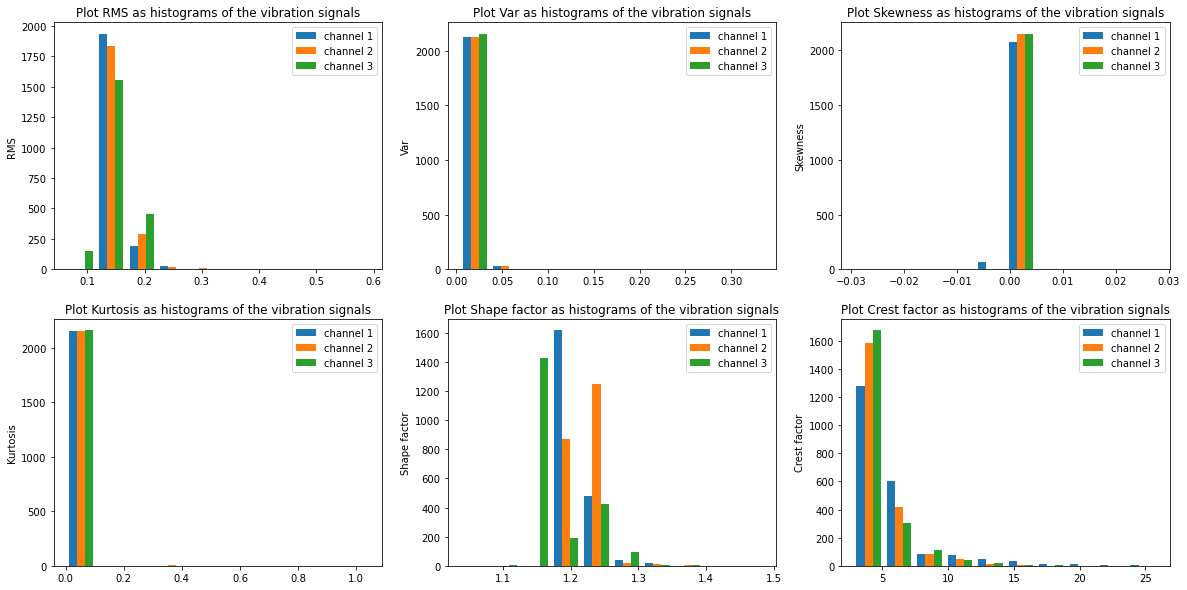

[50.07201414656772,
 50.67894294990724,
 58.09904628942486,
 52.352434137291276,
 54.90022509276438,
 72.13883418367347]

In [19]:
#use 1s window, and features from channel 1,2,3
model_build(train_list,test_list,train_label_1s,test_label_1s,3,'1,2,3','1s')

The score of model training score is  0.9919662596800503
Experiment with 1s window, and feature RMS from channel all four, get MSE score is 50.086277736549164
************************************************************************************************
The score of model training score is  0.9919156553467992
Experiment with 1s window, and feature Variance from channel all four, get MSE score is 50.80706080705009
************************************************************************************************
The score of model training score is  0.9416808748560334
Experiment with 1s window, and feature Skewness from channel all four, get MSE score is 58.15487741187384
************************************************************************************************
The score of model training score is  0.9868355145572436
Experiment with 1s window, and feature Kurtosis from channel all four, get MSE score is 52.20089721706865
*************************************************************

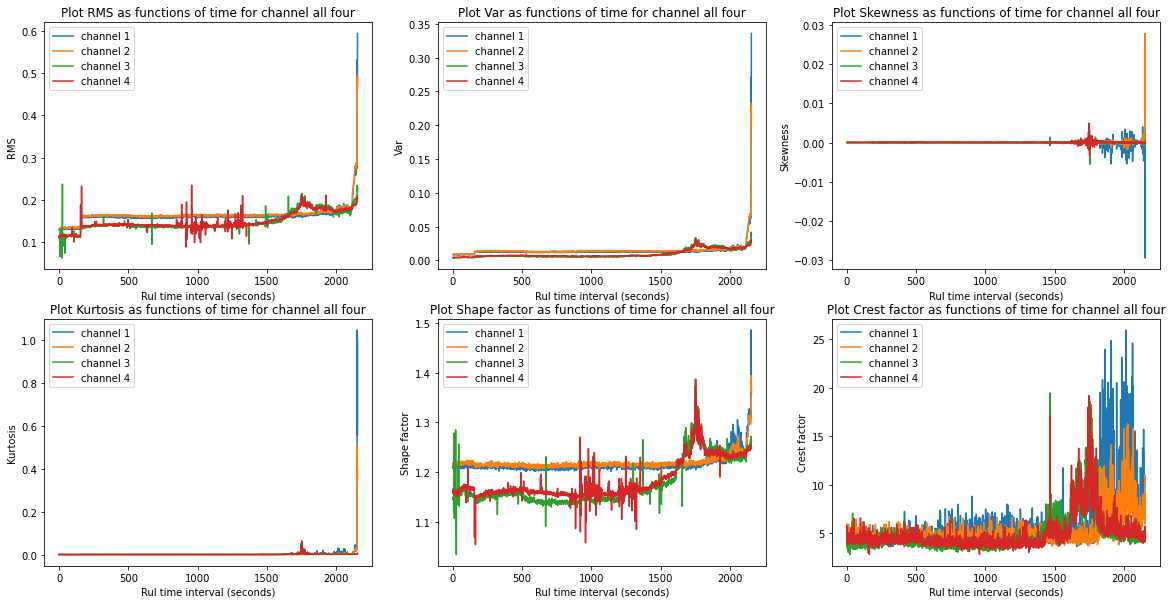

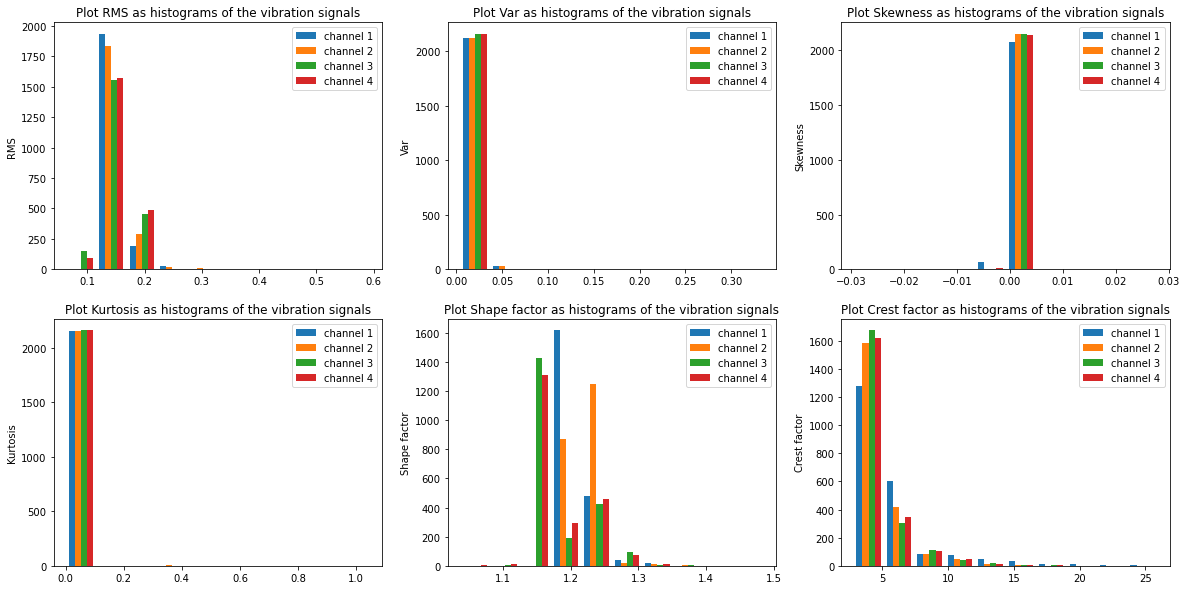

[50.086277736549164,
 50.80706080705009,
 58.15487741187384,
 52.20089721706865,
 54.999142996289436,
 76.03393483302412]

In [20]:
#use 1s window, and features from channel 1,2,3,4
model_build(train_list,test_list,train_label_1s,test_label_1s,4,'all four','1s')

### 3. Task 3

Repeat question #2 above using features computed over smaller windows than the full 1s window corresponding to a single file. You can try 0.1s and 0.5s non-overlapping windows. Smaller windows will give you more data points for the regression problem. Experiment with the same feature choices as part #2, and comments on any differences you observe.

    
    For this experiment, we selected a sliding window to conduct the experiment. A smaller window can often give us more data points for this regression problem. We select non-overlapping windows of 0.1 and 0.5 seconds, respectively. This means that for a 0.5 second non-overlapping window, two points will be generated. The first point is from the upper half of the data in a unit file, and the second point is from the lower half of the data in a unit file. Similarly, for a 0.1 second non-overlapping window, 10 data points will be generated, where the first point comes from the first 1/10 part of the data in a unit file. . . , And the last point comes from the last 1/10 part of data in a unit file.

    According to the above method, we generate corresponding labels for the non-overlapping windows of 0.1 seconds and 0.5 seconds respectively. The label generation method is based on the length of the remaining life in days. The labeling method is the same as the method in question 2. So the data point generated in the last 0.1 seconds will be 10 times the original data point, and the data point generated in the 0.5 second window will be twice the original data point.

For 0.5s smaller window:
    
    No matter how many channels are selected, the RMS, Variance, Kurtosis, and Shape factor attribute is more useful for the model. On the one hand, its histogram is more able to show the trend of normal distribution, and Shape factor is the lowest among all the MSE predictions of channels.
    In the case that the number of channels selected each time is equal, the scores of Skewness and Crest factor are basically similar.Of course, as the number of data points increases, the time interval graph can reflect that the jitter amplitude of the data stream becomes larger, but the stability of the prediction will be higher.
    
For 0.1s smaller window:

    RMS, Variance, Skewness, Kurtosis model prediction is significantly better than Shape factor and Crest factor. 
    For the first channel, the model's prediction is the worst for Creast factor, because its MSE score is as high as 73, and Shape factor prediction is best because his MSE score is only 84.

    For selecting the first two channels, the model can predict the Skewness attribute better than before (it only got 63 mse score), but it cannot predict the Skewness and Shape Factor attribute very well.

    For selecting the first three channels, the model can predict  RMS very well, and its image shows an obvious normal distribution trend, which is very helpful for us to predict, but it is not sensitive to  Crest factor attributes [But the shape of graphic is showing the decreasing].

    If all channels are selected, the prediction of RMS, Variance  attributes is still stable. On the other hand, as the number of tracks we select increases, as the time interval increases, the jitter amplitude of feature scores increases significantly, because the aliasing of graphics increases, which means that some data has been significantly marginalized.
    
    Therefore, the MSE score of the model generated by one channel is often smaller, but the MSE score of the model generated by selecting all channels is often larger, but the stability of the model is stronger. The MSE score of the model generated by 0.5s is often bigger, but the MSE score of the model generated by 0.1s is often smaller, but the stability of the model is stronger.

In [21]:
#for 0.5s smaller non overlapping window
rms1_05s,var1_05s,sk1_05s,ku1_05s,sf1_05s,cf1_05s=compute(f1,0.5, '1st_test\\')
rms2_05s,var2_05s,sk2_05s,ku2_05s,sf2_05s,cf2_05s=compute(f2,0.5, '2nd_test\\')
#for 0.1s smaller non overlapping window
rms1_01s,var1_01s,sk1_01s,ku1_01s,sf1_01s,cf1_01s=compute(f1,0.1, '1st_test\\')
rms2_01s,var2_01s,sk2_01s,ku2_01s,sf2_01s,cf2_01s=compute(f2,0.1, '2nd_test\\')

In [22]:
rms1_05s, var1_05s, sk1_05s, ku1_05s, sf1_05s, cf1_05s = np.array(rms1_05s), np.array(
    var1_05s), np.array(sk1_05s), np.array(ku1_05s), np.array(sf1_05s), np.array(cf1_05s)
rms2_05s, var2_05s, sk2_05s, ku2_05s, sf2_05s, cf2_05s = np.array(rms2_05s), np.array(
    var2_05s), np.array(sk2_05s), np.array(ku2_05s), np.array(sf2_05s), np.array(cf2_05s)
rms1_01s, var1_01s, sk1_01s, ku1_01s, sf1_01s, cf1_01s = np.array(rms1_01s), np.array(
    var1_01s), np.array(sk1_01s), np.array(ku1_01s), np.array(sf1_01s), np.array(cf1_01s)
rms2_01s, var2_01s, sk2_01s, ku2_01s, sf2_01s, cf2_01s = np.array(rms2_01s), np.array(
    var2_01s), np.array(sk2_01s), np.array(ku2_01s), np.array(sf2_01s), np.array(cf2_01s)

In [23]:
#create the label for 0.1 and 0.5s smaller window
train_label_05s = create_label(f2, 0.5)
test_label_05s = create_label(f1, 0.5)
train_label_01s = create_label(f2, 0.1)
test_label_01s = create_label(f1, 0.1)

In [24]:
test_list_05s=[rms1_05s,var1_05s,sk1_05s,ku1_05s,sf1_05s,cf1_05s]
train_list_05s=[rms2_05s,var2_05s,sk2_05s,ku2_05s,sf2_05s,cf2_05s]

test_list_01s=[rms1_01s,var1_01s,sk1_01s,ku1_01s,sf1_01s,cf1_01s]
train_list_01s=[rms2_01s,var2_01s,sk2_01s,ku2_01s,sf2_01s,cf2_01s]

The score of model training score is  0.9575055863720288
Experiment with 0.5s window, and feature RMS from channel 1, get MSE score is 57.30987680890538
************************************************************************************************
The score of model training score is  0.9430418897584256
Experiment with 0.5s window, and feature Variance from channel 1, get MSE score is 58.526438126159555
************************************************************************************************
The score of model training score is  0.6953468987817683
Experiment with 0.5s window, and feature Skewness from channel 1, get MSE score is 72.48843488871
************************************************************************************************
The score of model training score is  0.8523782713675501
Experiment with 0.5s window, and feature Kurtosis from channel 1, get MSE score is 56.98649349964149
************************************************************************************

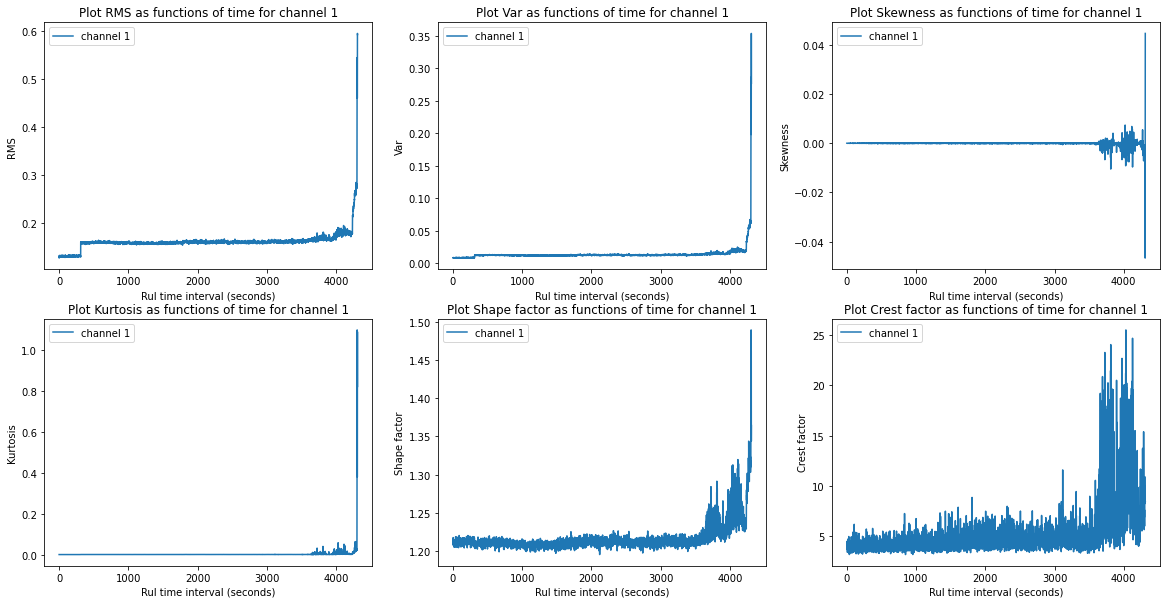

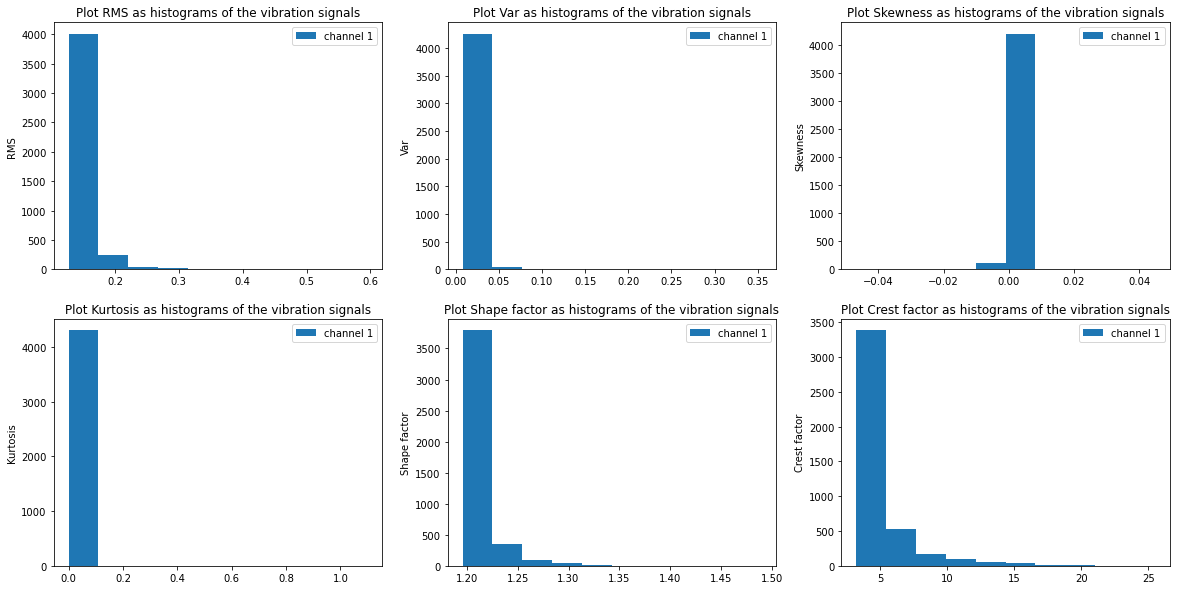

[57.30987680890538,
 58.526438126159555,
 72.48843488871,
 56.98649349964149,
 55.08718439714106,
 73.86628723735441]

In [25]:
#use 0.5s window, and features from channel 1 only
model_build(train_list_05s,test_list_05s,train_label_05s,test_label_05s,1,'1','0.5s')

The score of model training score is  0.9811505537000285
Experiment with 0.5s window, and feature RMS from channel 1,2, get MSE score is 50.02197288961039
************************************************************************************************
The score of model training score is  0.9812764470998073
Experiment with 0.5s window, and feature Variance from channel 1,2, get MSE score is 53.73946567717998
************************************************************************************************
The score of model training score is  0.9265044953996078
Experiment with 0.5s window, and feature Skewness from channel 1,2, get MSE score is 63.05845753717005
************************************************************************************************
The score of model training score is  0.9799576612450742
Experiment with 0.5s window, and feature Kurtosis from channel 1,2, get MSE score is 53.582791906307975
*************************************************************************

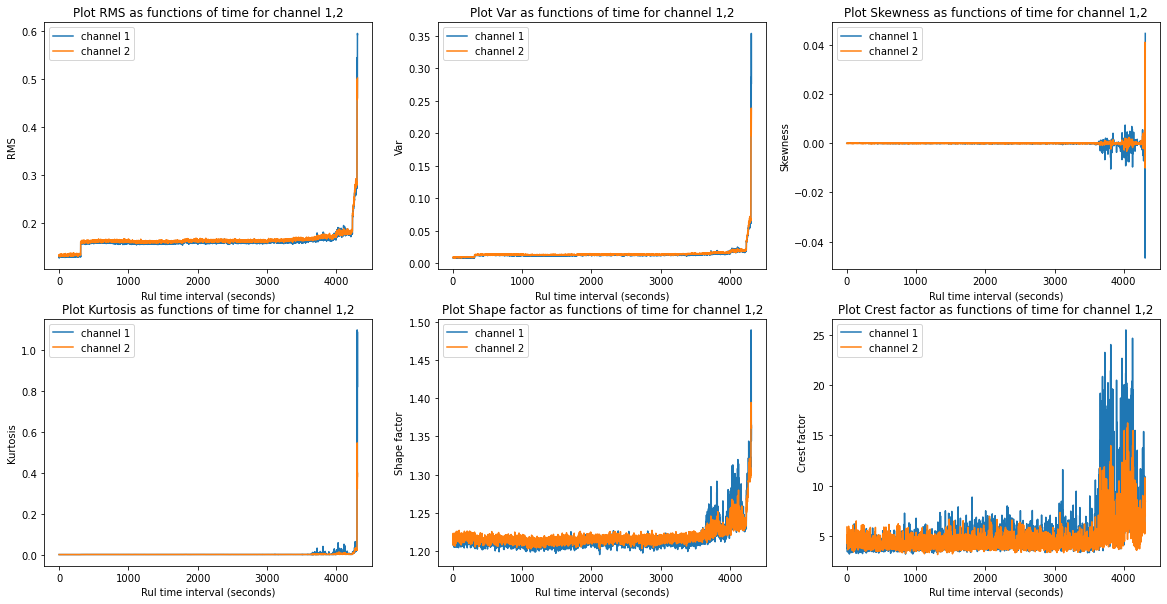

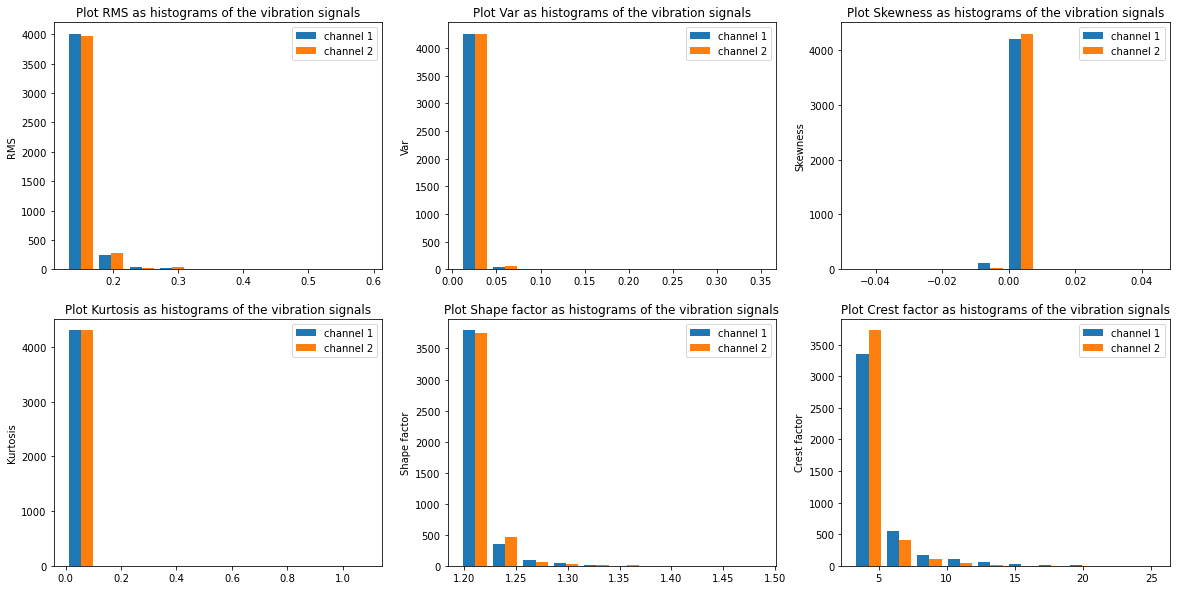

[50.02197288961039,
 53.73946567717998,
 63.05845753717005,
 53.582791906307975,
 53.196696799628945,
 83.8909724953618]

In [26]:
#use 1s window, and features from channel 1,2
model_build(train_list_05s,test_list_05s,train_label_05s,test_label_05s,2,'1,2','0.5s')

The score of model training score is  0.9883618223964804
Experiment with 0.5s window, and feature RMS from channel 1,2,3, get MSE score is 49.97272840909091
************************************************************************************************
The score of model training score is  0.9883811140384643
Experiment with 0.5s window, and feature Variance from channel 1,2,3, get MSE score is 52.01158884508349
************************************************************************************************
The score of model training score is  0.9326066333363299
Experiment with 0.5s window, and feature Skewness from channel 1,2,3, get MSE score is 63.3643357606679
************************************************************************************************
The score of model training score is  0.9823302672189452
Experiment with 0.5s window, and feature Kurtosis from channel 1,2,3, get MSE score is 53.4283883580705
********************************************************************

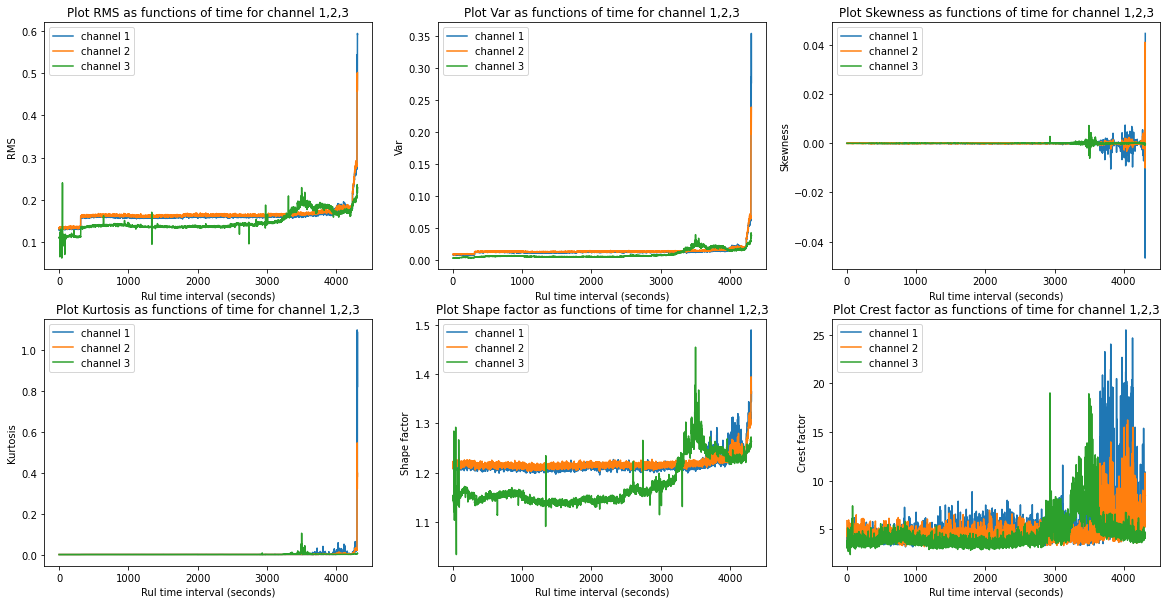

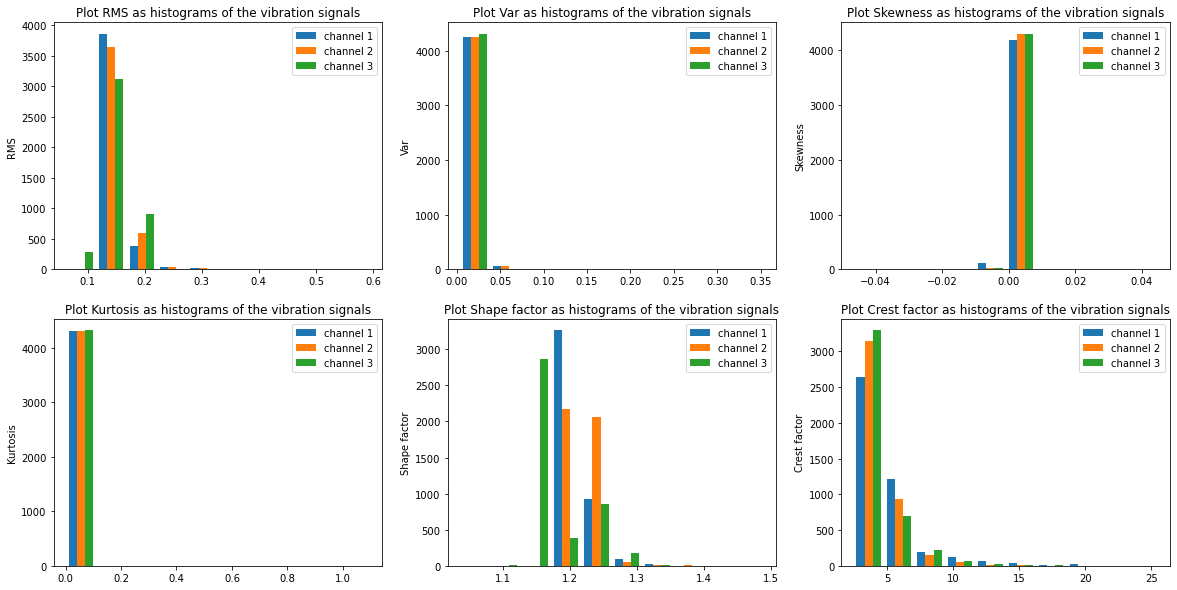

[49.97272840909091,
 52.01158884508349,
 63.3643357606679,
 53.4283883580705,
 54.08572045454545,
 70.90805185528757]

In [27]:
#use 0.5s window, and features from channel 1,2,3
model_build(train_list_05s,test_list_05s,train_label_05s,test_label_05s,3,'1,2,3','0.5s')

The score of model training score is  0.988704308894928
Experiment with 0.5s window, and feature RMS from channel all four, get MSE score is 49.978295570500926
************************************************************************************************
The score of model training score is  0.9887550770370268
Experiment with 0.5s window, and feature Variance from channel all four, get MSE score is 52.557882026901666
************************************************************************************************
The score of model training score is  0.9358210921563068
Experiment with 0.5s window, and feature Skewness from channel all four, get MSE score is 61.87766208256029
************************************************************************************************
The score of model training score is  0.982543168318201
Experiment with 0.5s window, and feature Kurtosis from channel all four, get MSE score is 53.4783297541744
*******************************************************

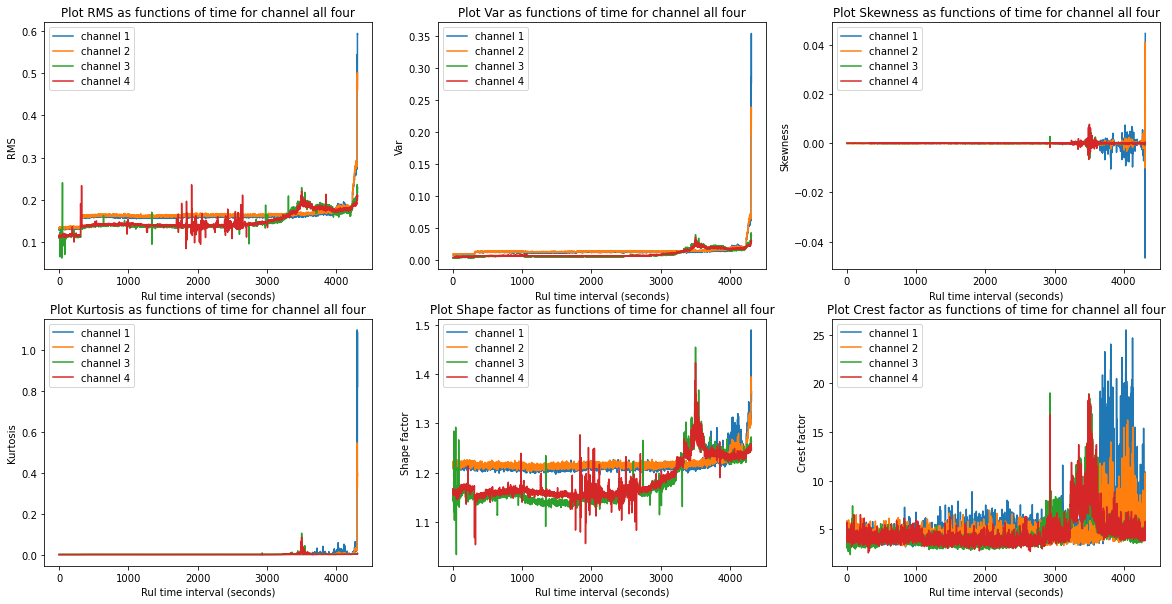

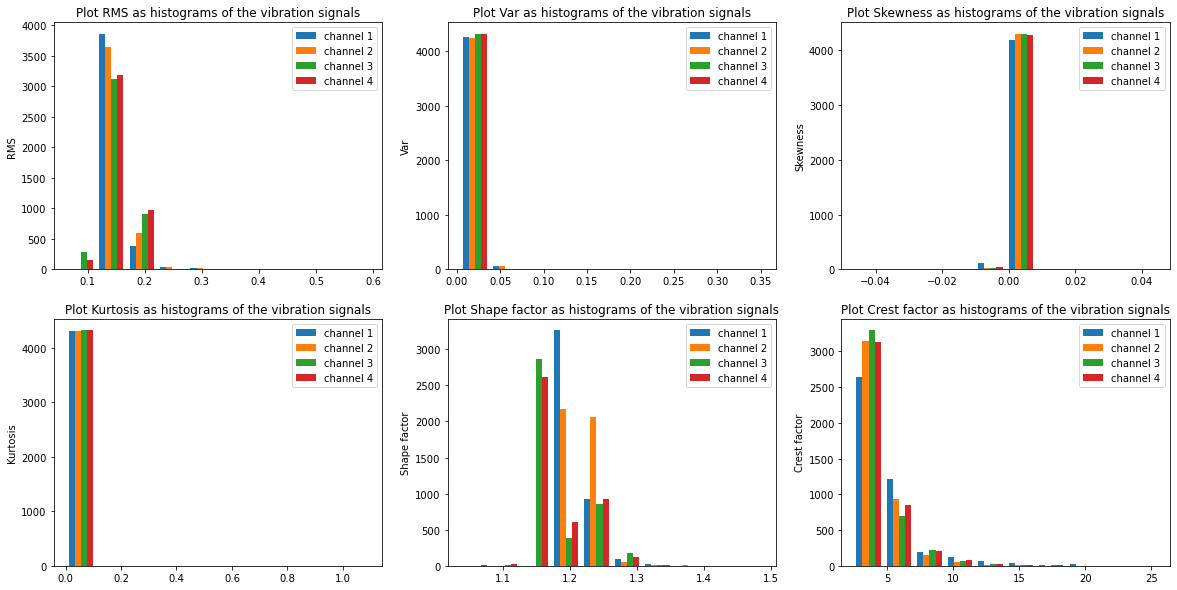

[49.978295570500926,
 52.557882026901666,
 61.87766208256029,
 53.4783297541744,
 54.18619301948052,
 72.73478376623376]

In [28]:
#use 0.5s window, and features from channel 1,2,3,4
model_build(train_list_05s,test_list_05s,train_label_05s,test_label_05s,4,'all four','0.5s')

The score of model training score is  0.9510561540107845
Experiment with 0.1s window, and feature RMS from channel 1, get MSE score is 57.209845874478425
************************************************************************************************
The score of model training score is  0.9203603262222593
Experiment with 0.1s window, and feature Variance from channel 1, get MSE score is 59.220814366783
************************************************************************************************
The score of model training score is  0.5677940257246706
Experiment with 0.1s window, and feature Skewness from channel 1, get MSE score is 73.42014714022997
************************************************************************************************
The score of model training score is  0.8101541518553841
Experiment with 0.1s window, and feature Kurtosis from channel 1, get MSE score is 58.598656971896716
**********************************************************************************

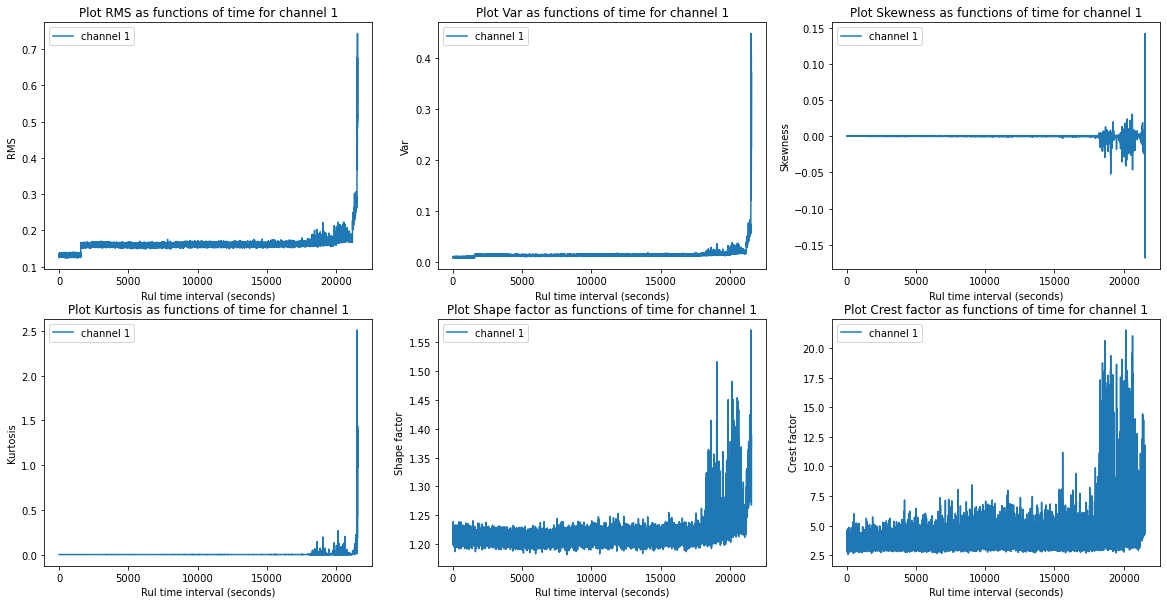

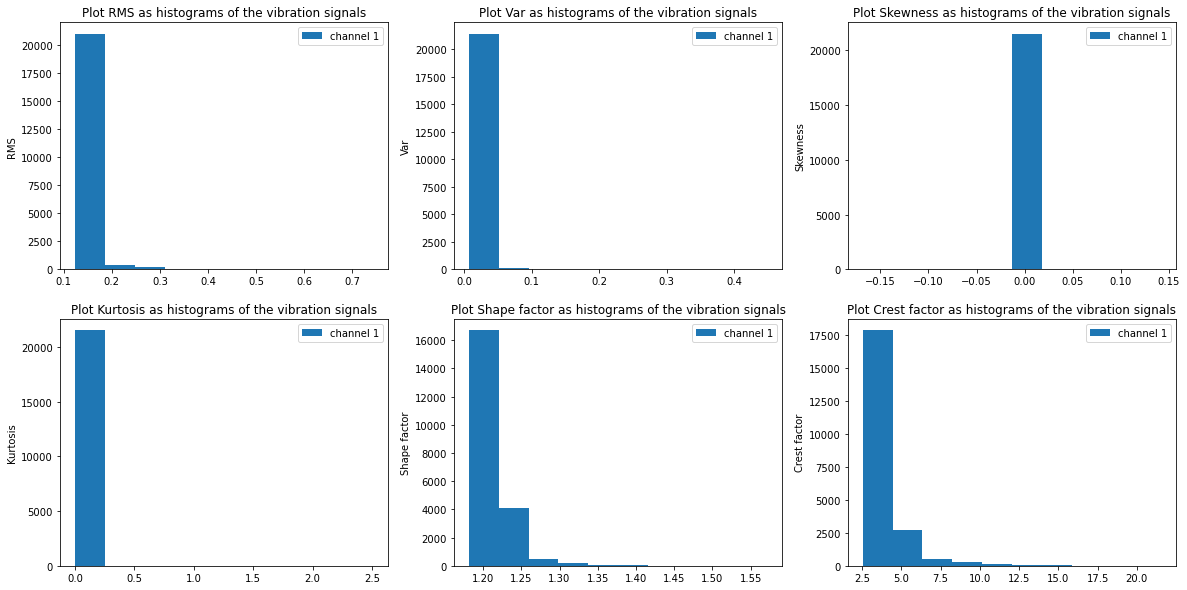

[57.209845874478425,
 59.220814366783,
 73.42014714022997,
 58.598656971896716,
 58.53839010035823,
 78.55015454005814]

In [29]:
#use 0.1s window, and features from channel 1 only
model_build(train_list_01s,test_list_01s,train_label_01s,test_label_01s,1,'1','0.1s')

The score of model training score is  0.9730002394436645
Experiment with 0.1s window, and feature RMS from channel 1,2, get MSE score is 49.892985463821894
************************************************************************************************
The score of model training score is  0.9724383120927349
Experiment with 0.1s window, and feature Variance from channel 1,2, get MSE score is 55.58543287569572
************************************************************************************************
The score of model training score is  0.9180604329694745
Experiment with 0.1s window, and feature Skewness from channel 1,2, get MSE score is 67.90223555526656
************************************************************************************************
The score of model training score is  0.9672635360807911
Experiment with 0.1s window, and feature Kurtosis from channel 1,2, get MSE score is 54.66270461961967
*************************************************************************

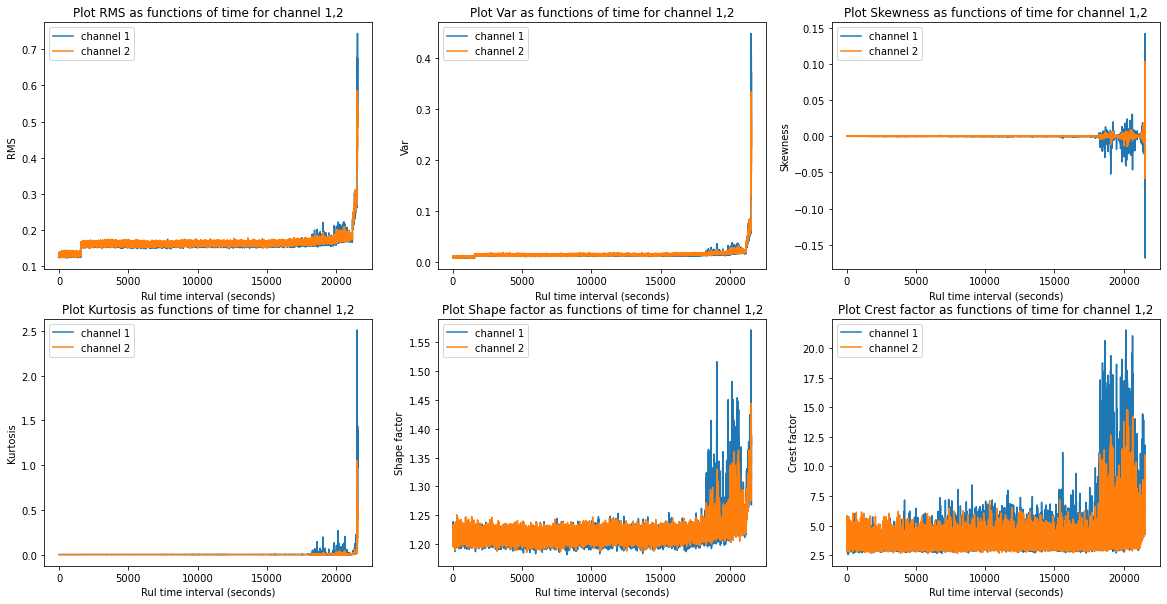

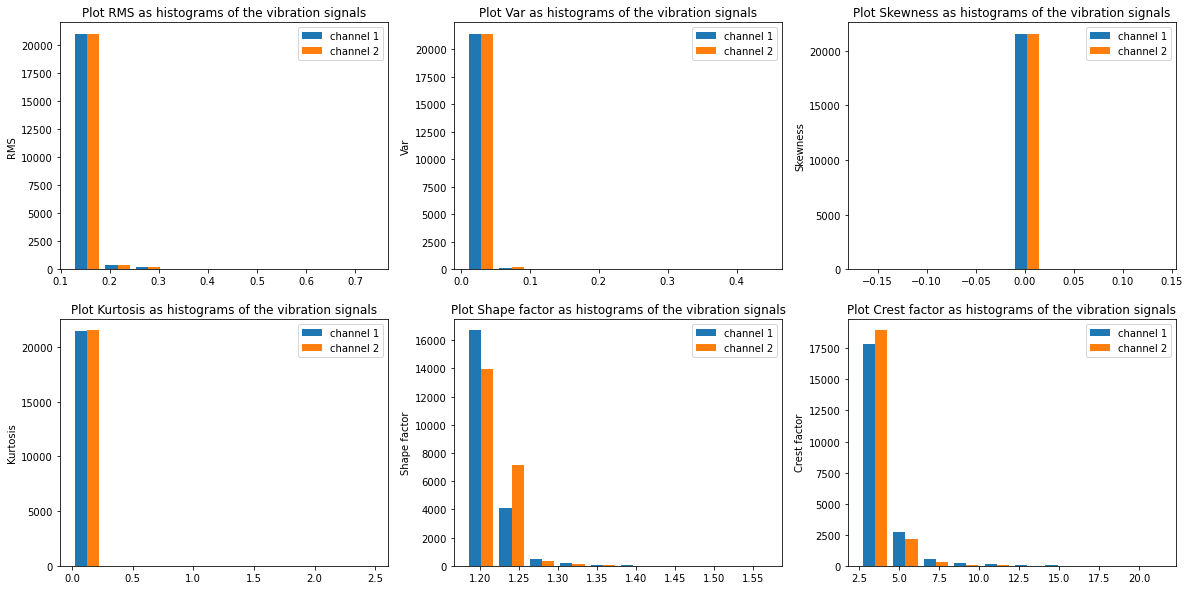

[49.892985463821894,
 55.58543287569572,
 67.90223555526656,
 54.66270461961967,
 58.17918917903525,
 79.73455432745826]

In [30]:
#use 0.1s window, and features from channel 1,2
model_build(train_list_01s,test_list_01s,train_label_01s,test_label_01s,2,'1,2','0.1s')

The score of model training score is  0.978770532109838
Experiment with 0.1s window, and feature RMS from channel 1,2,3, get MSE score is 49.8958616419295
************************************************************************************************
The score of model training score is  0.9786873776984857
Experiment with 0.1s window, and feature Variance from channel 1,2,3, get MSE score is 55.59456070500927
************************************************************************************************
The score of model training score is  0.9247197967909755
Experiment with 0.1s window, and feature Skewness from channel 1,2,3, get MSE score is 68.13142571428571
************************************************************************************************
The score of model training score is  0.9731547363883837
Experiment with 0.1s window, and feature Kurtosis from channel 1,2,3, get MSE score is 54.319508738404444
*******************************************************************

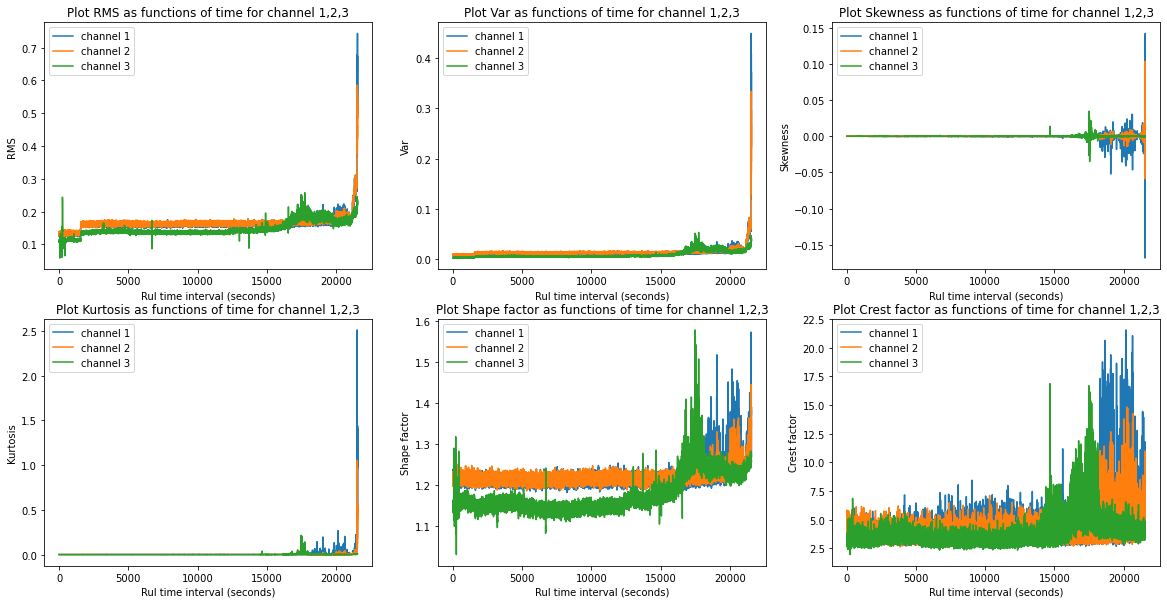

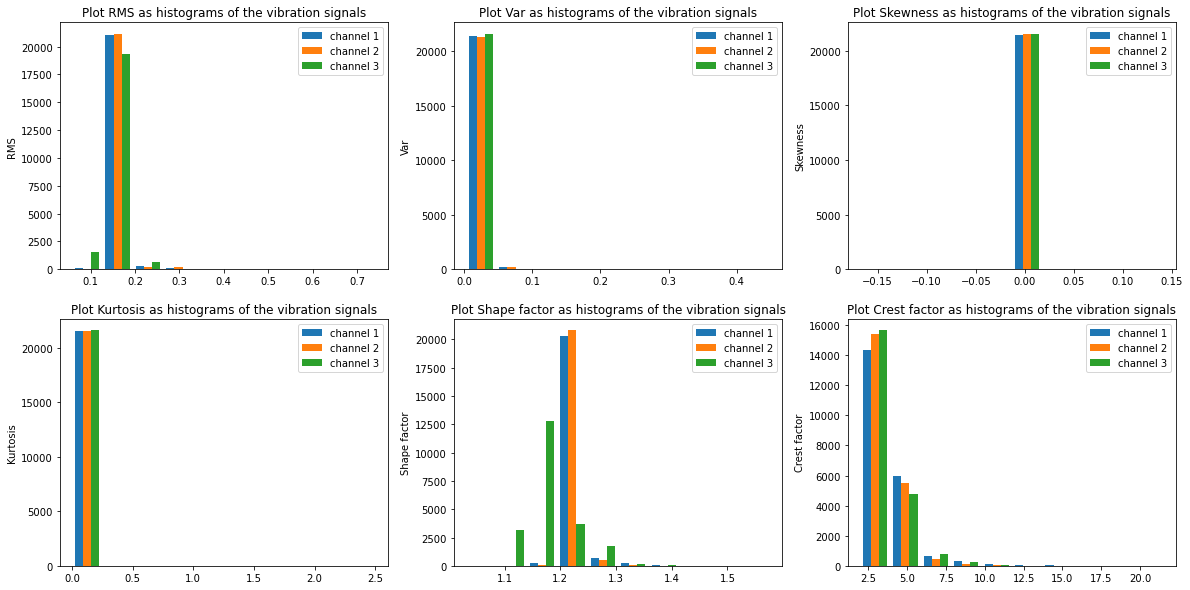

[49.8958616419295,
 55.59456070500927,
 68.13142571428571,
 54.319508738404444,
 56.623040691094616,
 68.9473623237477]

In [31]:
#use 0.1s window, and features from channel 1,2,3
model_build(train_list_01s,test_list_01s,train_label_01s,test_label_01s,3,'1,2,3','0.1s')

The score of model training score is  0.9795469684068667
Experiment with 0.1s window, and feature RMS from channel all four, get MSE score is 49.890072346938766
************************************************************************************************
The score of model training score is  0.9795760532978055
Experiment with 0.1s window, and feature Variance from channel all four, get MSE score is 55.82602918367348
************************************************************************************************
The score of model training score is  0.9291210456720888
Experiment with 0.1s window, and feature Skewness from channel all four, get MSE score is 60.79194291280148
************************************************************************************************
The score of model training score is  0.9739793148456762
Experiment with 0.1s window, and feature Kurtosis from channel all four, get MSE score is 55.149094067717996
****************************************************

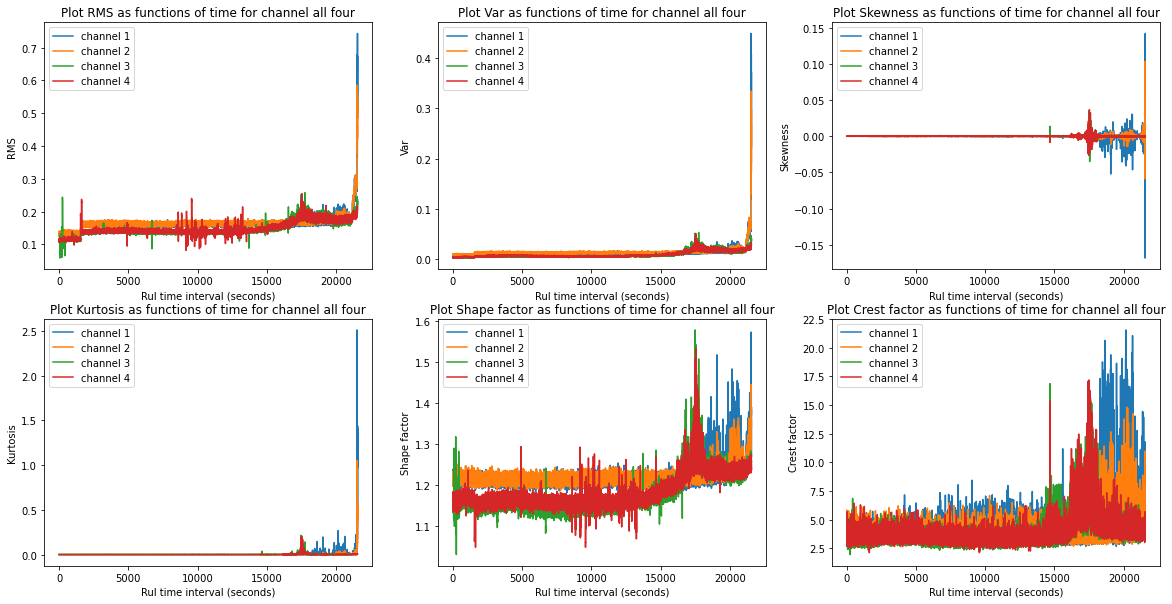

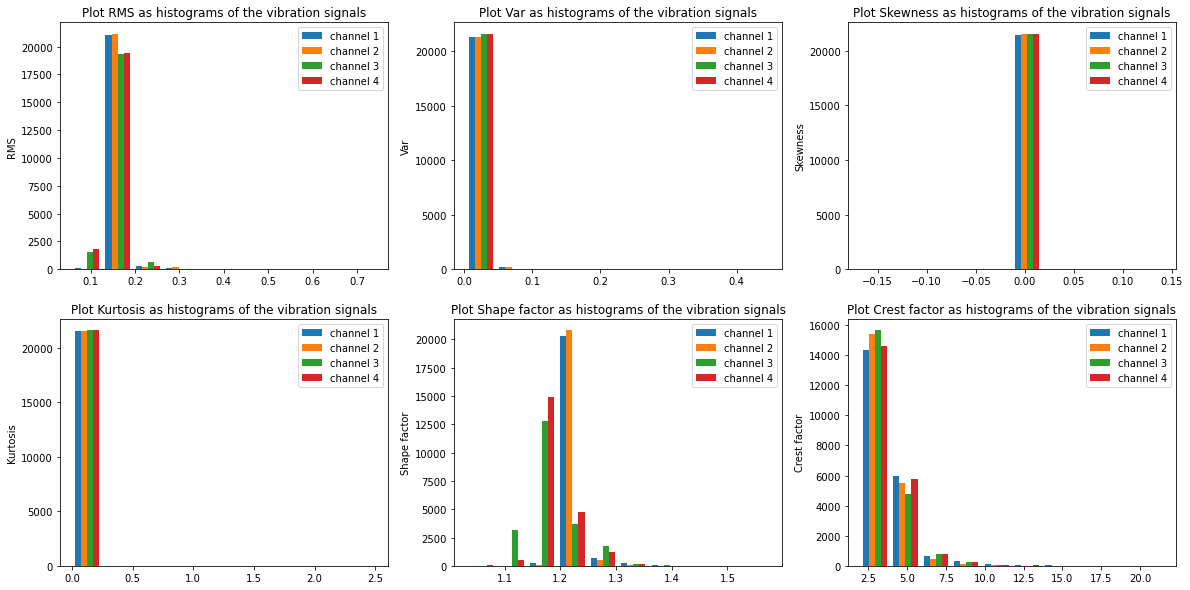

[49.890072346938766,
 55.82602918367348,
 60.79194291280148,
 55.149094067717996,
 56.48479717532468,
 70.20394727272728]

In [32]:
#use 0.1s window, and features from channel 1,2,3,4
model_build(train_list_01s,test_list_01s,train_label_01s,test_label_01s,4,'all four','0.1s')

### 4. Task 4

Use concept drift methods on step 4 and find out if there is any drift in the data that can be detected. Try to play with the input parameters and justify the one you chose. What is the implication of concept drift for the task?


    The relationship between the input variable and the output variable has changed over time. For example, the prediction accuracy of the model begins to decrease over time, which means that the concept drift phenomenon has occurred.

    First, we first convert our input data into the form of a data stream, and then we use the Prequential error model to take samples based on the first test and then train to observe how our training model will change over time. We can see that when we train the original data of the 1 second window, we can observe the average and current value of MSE, which will change at the end, which proves that a concept drift will occur. For further exploration, we also trained the Prequential error model on the 0.5 second window, and observed the same result.

    In order to further prove that there is a concept drift in the data stream, we still use the adaptive sliding window algorithm model to detect the concept drift. Our approach is to add each input data to the model in order to test it. When the model detects a major change in the data stream, it reports the index position of the concept drift.

    In order to deal with this concept drifting data stream, we used the Random Forest Regressor-->Adaptive Random Forest Regressor model. Afterwards, we performed recursive iterative detection on the data with concept drift, deleted the data stream with concept drift, and used the adaptive sliding window model to detect concept drift, which helped reduce concept drift in further modeling and then trained Use the latest data to create a new model and draw a picture.

    For our task, we can find that concept drift has a serious impact on our experiments. For example, at first, 6 attributes in 4 channels showed a standard or uniform change trend over time, but When the concept drift occurs, we can see that the time interval has changed strongly or oscillated at certain stages, which we can observe from the image.
    Secondly, when our data predicts RUL, we can clearly find from the distribution histogram that the label distribution of the second RUL is sometimes erroneously counted to a certain category, which means that it happened at this stage, or because we The selected model is incorrect.

    Therefore, concept drift will cause us to be unable to create the ideal model and achieve the appropriate RUL prediction results, because as the number of days changes, the model may become less and less accurate over time

In [33]:
# Import the prequential evaluation method from skmultiflow model
from skmultiflow.evaluation import EvaluatePrequential
from skmultiflow.meta import AdaptiveRandomForestRegressor
from skmultiflow.data.data_stream import DataStream
%matplotlib notebook


def concept_drift_Prequential(train_list, test_list, train_label, test_label, ch_index, ch, windows):
    forest = AdaptiveRandomForestRegressor(random_state=0)
    # Create the prequential evaluation model
    eval = EvaluatePrequential(show_plot=True, metrics=[
                               'mean_square_error', 'running_time', 'model_size'])
    for i in train_list:
        # Evaluates a model from data stream and draw it
        a = DataStream(i[:, :ch_index], y=np.array(
            train_label), n_targets=ch_index)
        eval.evaluate(stream=a, model=forest, model_names=['Forest'])

<IPython.core.display.Javascript object>


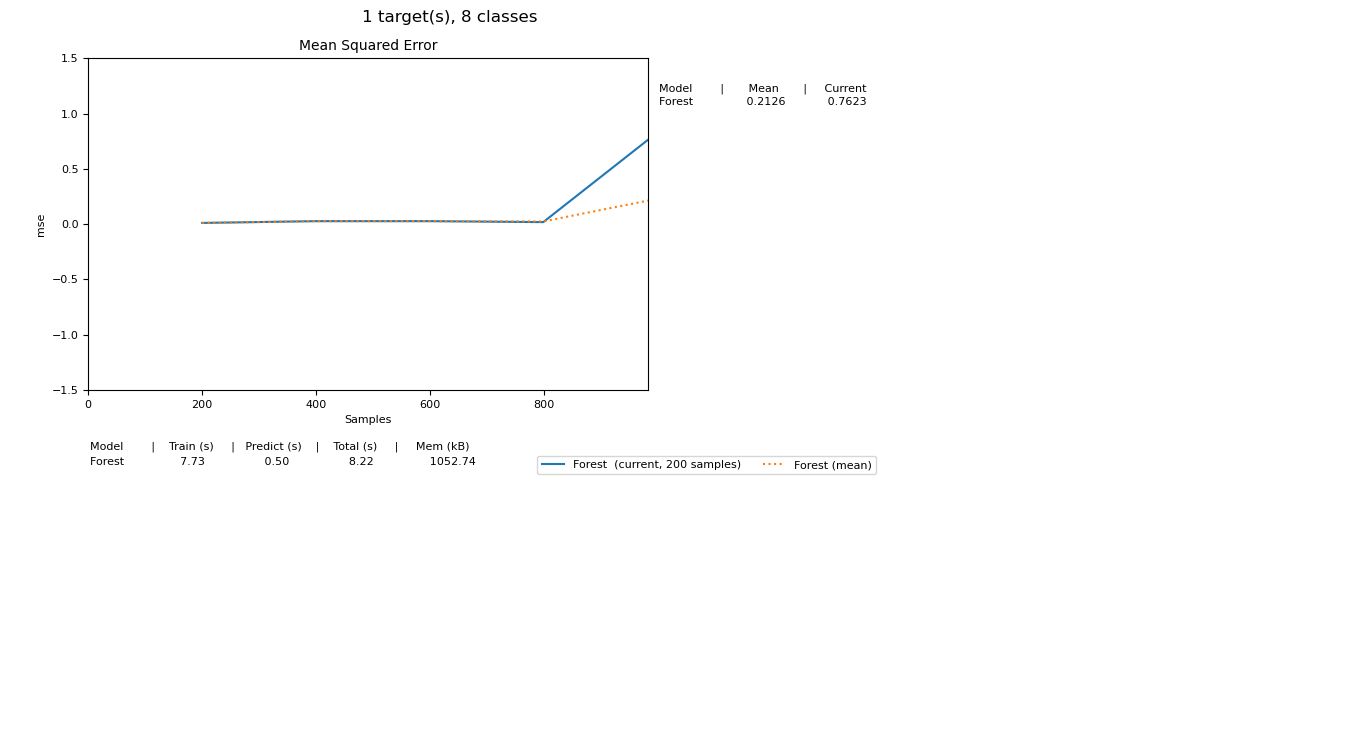

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 200 sample(s).
Evaluating...
 #################### [100%] [8.65s]
Processed samples: 984
Mean performance:
Forest - MSE          : 0.2126
Forest - Training time (s)  : 7.73
Forest - Testing time  (s)  : 0.50
Forest - Total time    (s)  : 8.22
Forest - Size (kB)          : 1052.7373


<IPython.core.display.Javascript object>


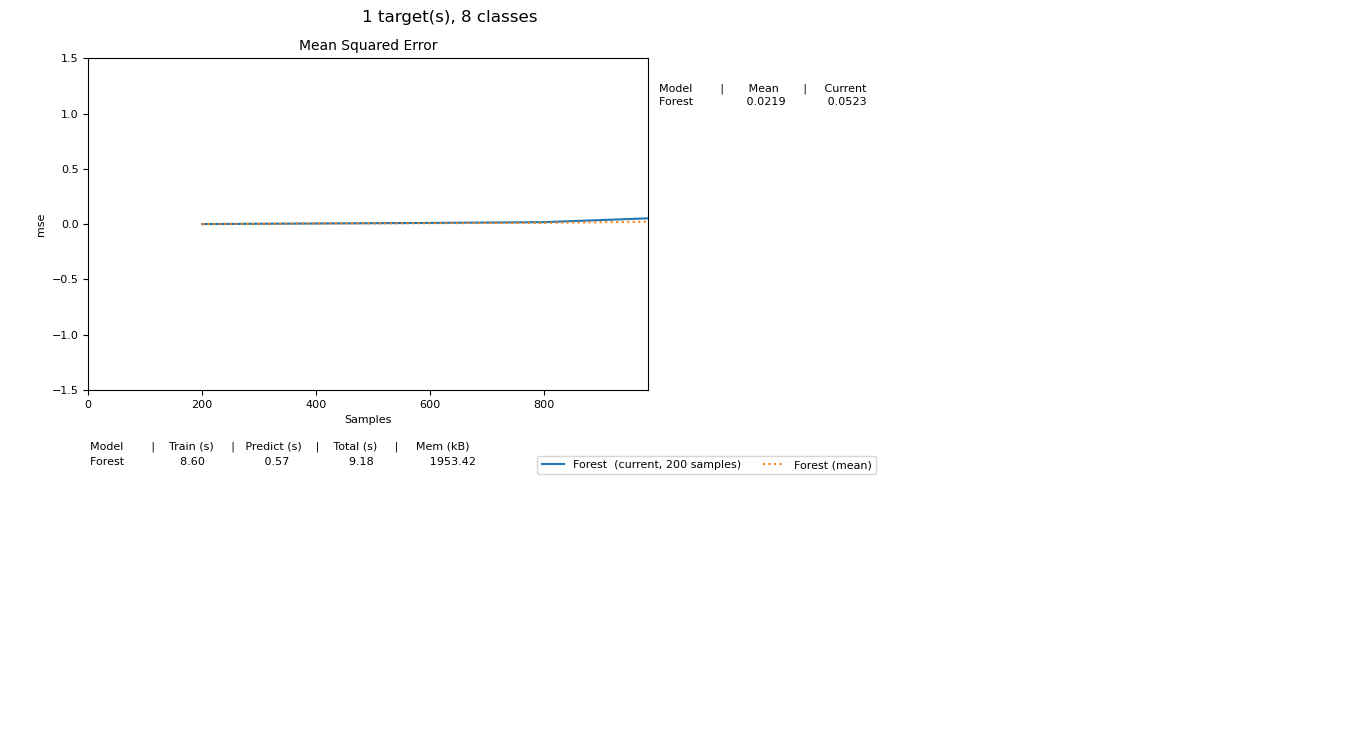

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 200 sample(s).
Evaluating...
 #################### [100%] [9.70s]
Processed samples: 984
Mean performance:
Forest - MSE          : 0.0219
Forest - Training time (s)  : 8.60
Forest - Testing time  (s)  : 0.57
Forest - Total time    (s)  : 9.18
Forest - Size (kB)          : 1953.4170


<IPython.core.display.Javascript object>


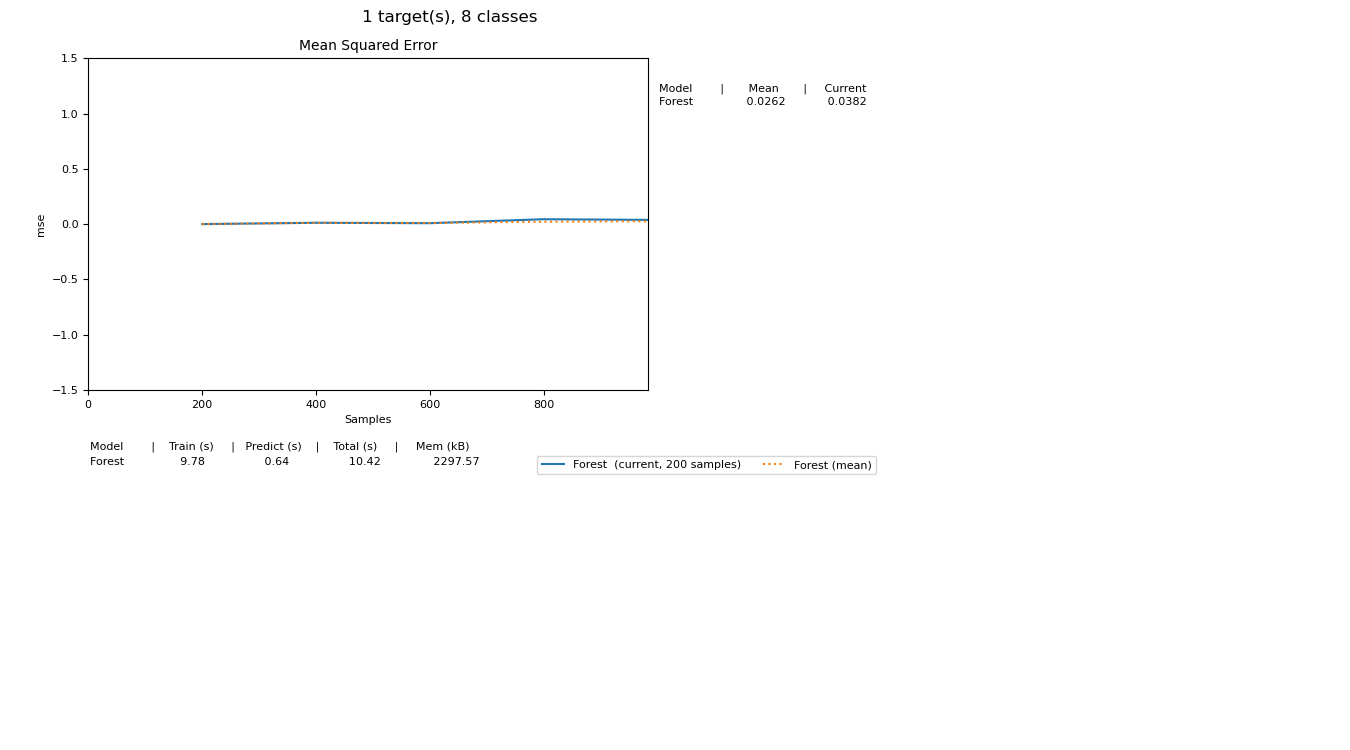

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 200 sample(s).
Evaluating...
 #################### [100%] [11.00s]
Processed samples: 984
Mean performance:
Forest - MSE          : 0.0262
Forest - Training time (s)  : 9.78
Forest - Testing time  (s)  : 0.64
Forest - Total time    (s)  : 10.42
Forest - Size (kB)          : 2297.5732


<IPython.core.display.Javascript object>


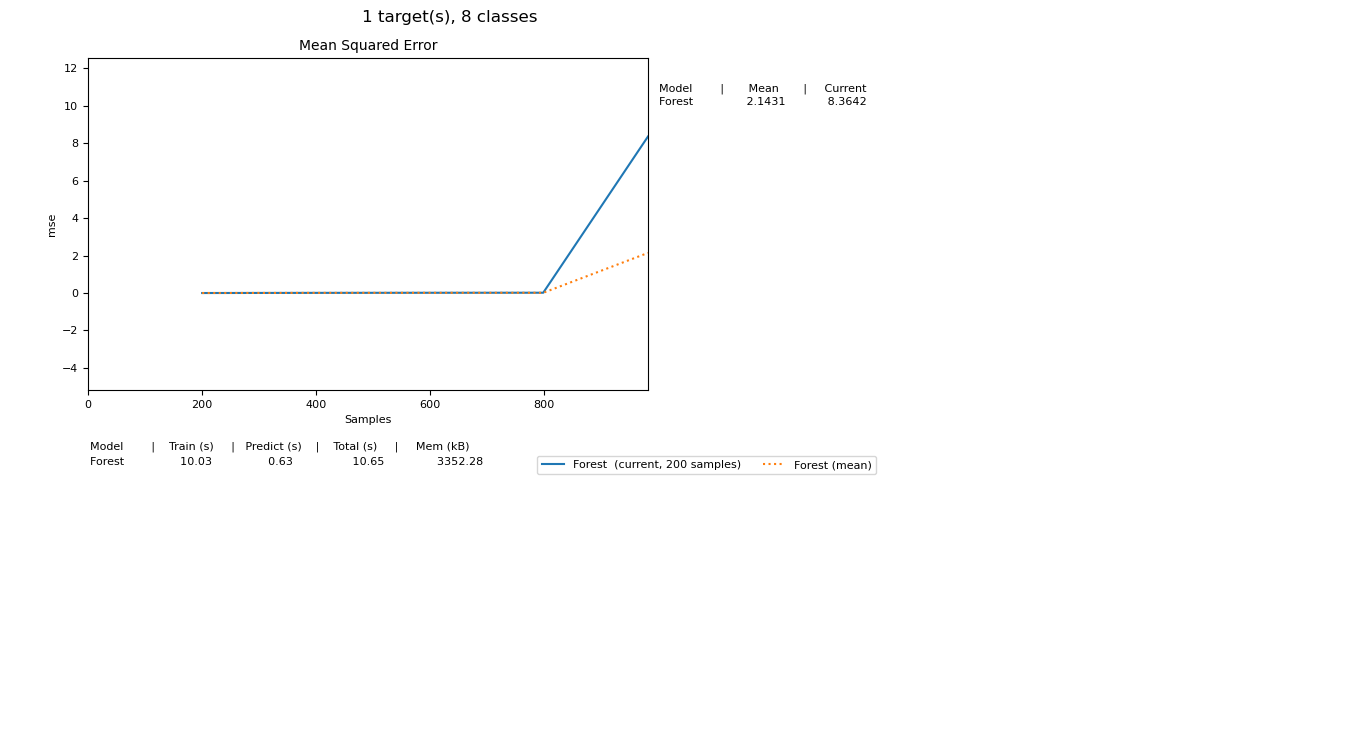

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 200 sample(s).
Evaluating...
 #################### [100%] [11.32s]
Processed samples: 984
Mean performance:
Forest - MSE          : 2.1431
Forest - Training time (s)  : 10.03
Forest - Testing time  (s)  : 0.63
Forest - Total time    (s)  : 10.65
Forest - Size (kB)          : 3352.2842


<IPython.core.display.Javascript object>


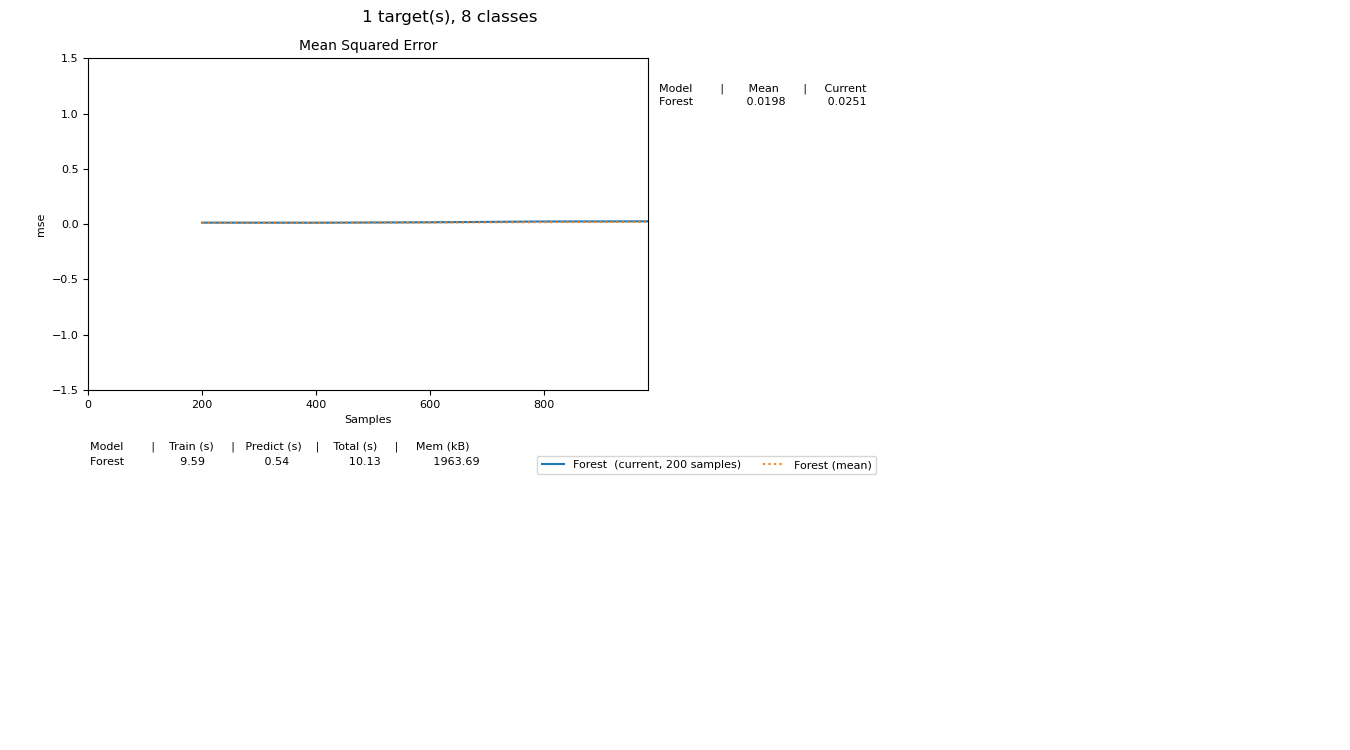

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 200 sample(s).
Evaluating...
 #################### [100%] [10.65s]
Processed samples: 984
Mean performance:
Forest - MSE          : 0.0198
Forest - Training time (s)  : 9.59
Forest - Testing time  (s)  : 0.54
Forest - Total time    (s)  : 10.13
Forest - Size (kB)          : 1963.6865


<IPython.core.display.Javascript object>


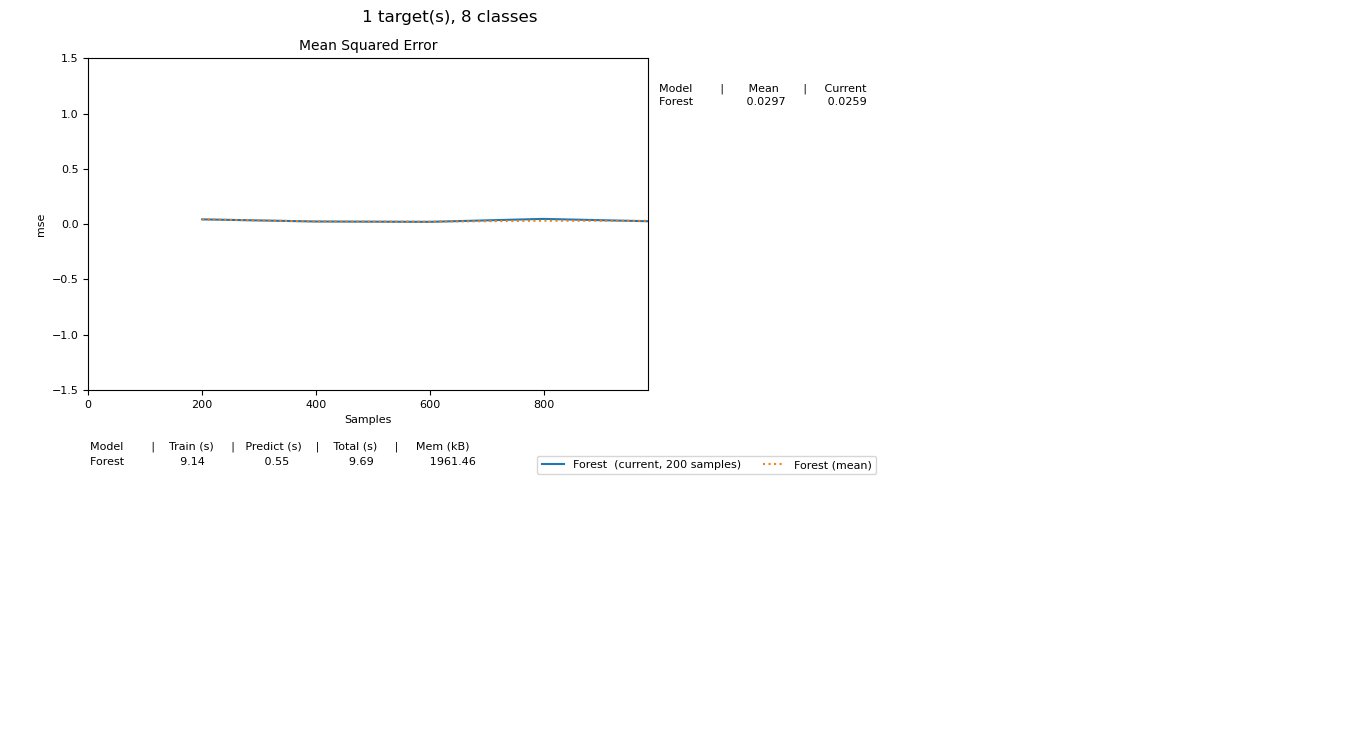

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 200 sample(s).
Evaluating...
 #################### [100%] [10.24s]
Processed samples: 984
Mean performance:
Forest - MSE          : 0.0297
Forest - Training time (s)  : 9.14
Forest - Testing time  (s)  : 0.55
Forest - Total time    (s)  : 9.69
Forest - Size (kB)          : 1961.4600


In [34]:
#use 1s window, and features from channel 1,2,3,4
concept_drift_Prequential(train_list,test_list,train_label_1s,test_label_1s,4,'all four','1s')

<IPython.core.display.Javascript object>


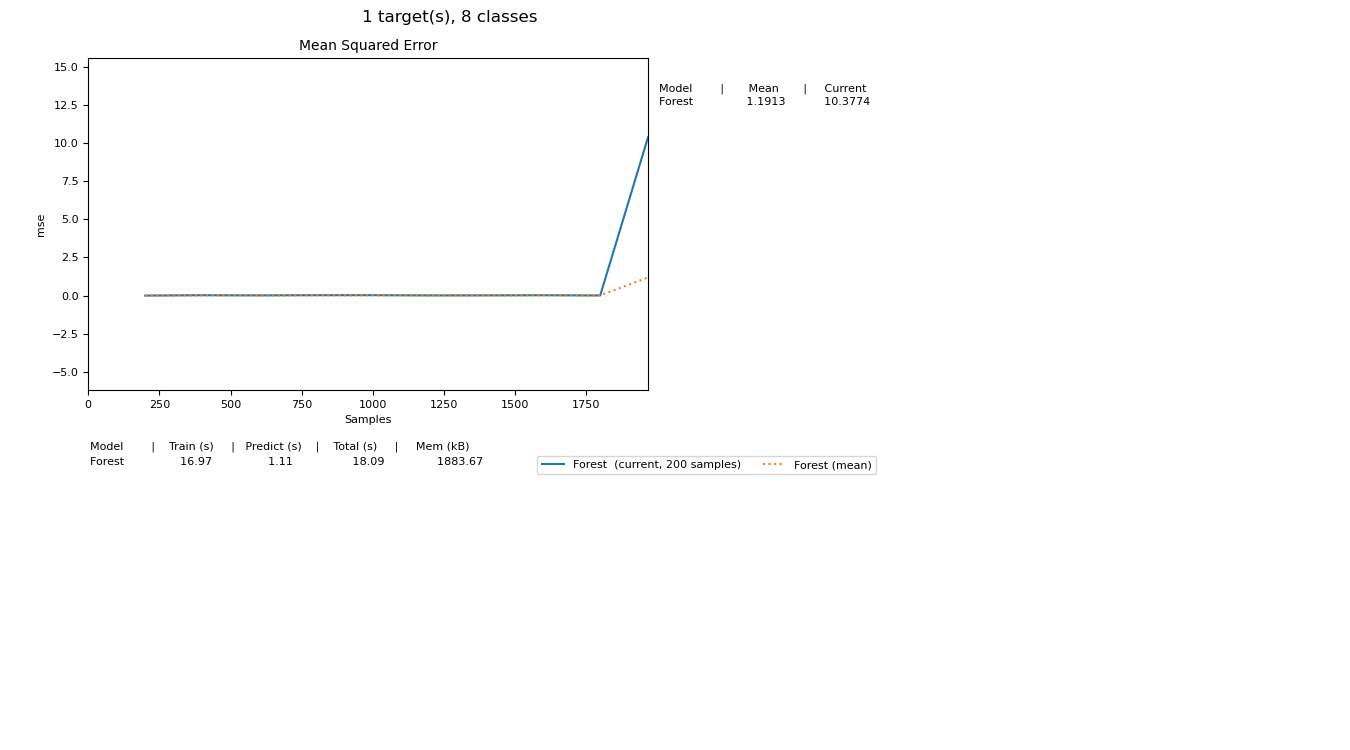

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 200 sample(s).
Evaluating...
 #################### [100%] [19.17s]
Processed samples: 1968
Mean performance:
Forest - MSE          : 1.1913
Forest - Training time (s)  : 16.97
Forest - Testing time  (s)  : 1.11
Forest - Total time    (s)  : 18.09
Forest - Size (kB)          : 1883.6709


<IPython.core.display.Javascript object>


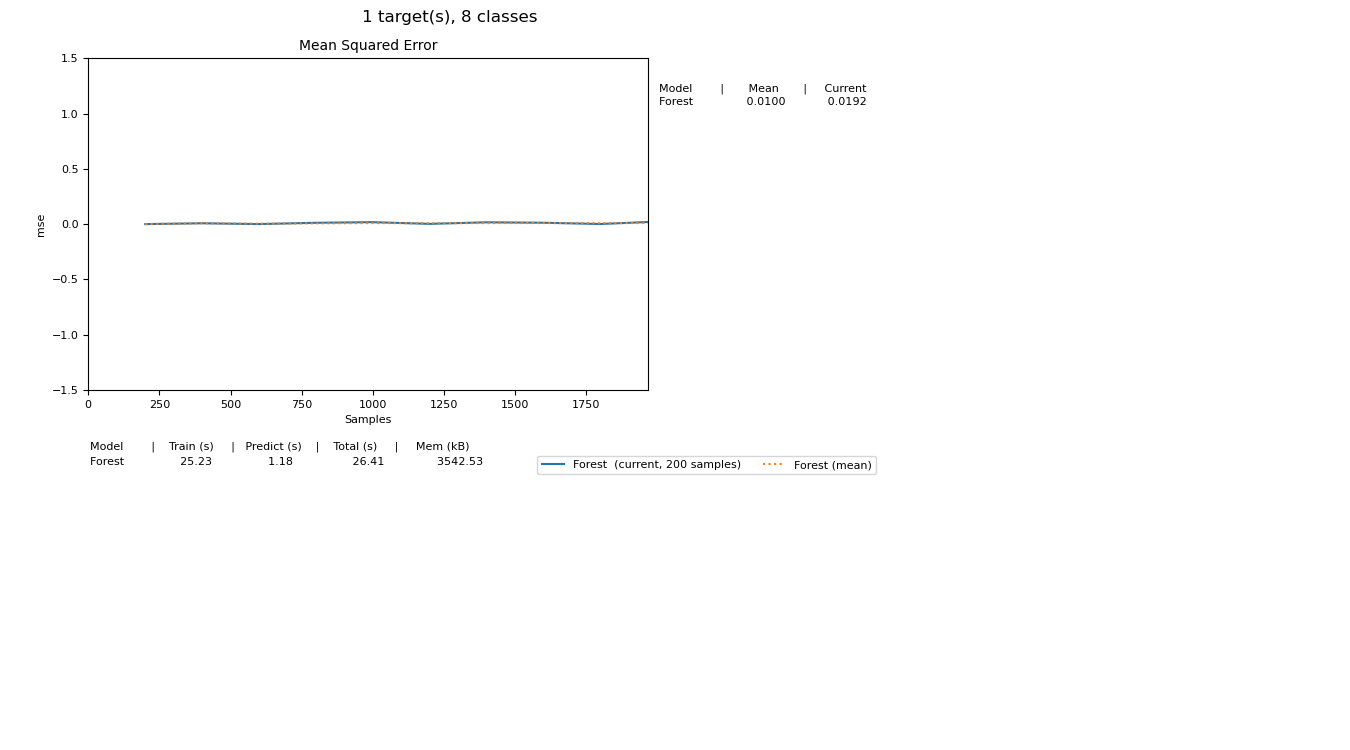

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 200 sample(s).
Evaluating...
 #################### [100%] [27.75s]
Processed samples: 1968
Mean performance:
Forest - MSE          : 0.0100
Forest - Training time (s)  : 25.23
Forest - Testing time  (s)  : 1.18
Forest - Total time    (s)  : 26.41
Forest - Size (kB)          : 3542.5303


<IPython.core.display.Javascript object>


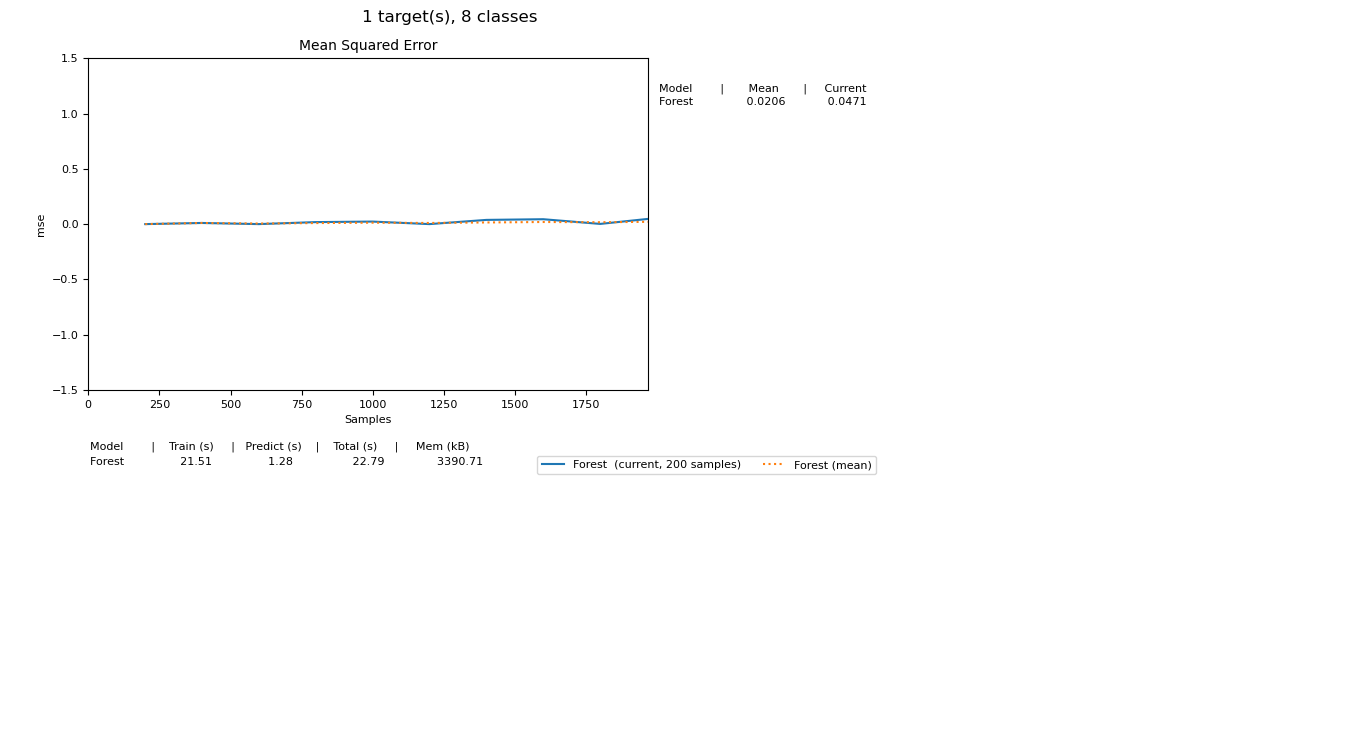

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 200 sample(s).
Evaluating...
 #################### [100%] [24.36s]
Processed samples: 1968
Mean performance:
Forest - MSE          : 0.0206
Forest - Training time (s)  : 21.51
Forest - Testing time  (s)  : 1.28
Forest - Total time    (s)  : 22.79
Forest - Size (kB)          : 3390.7061


<IPython.core.display.Javascript object>


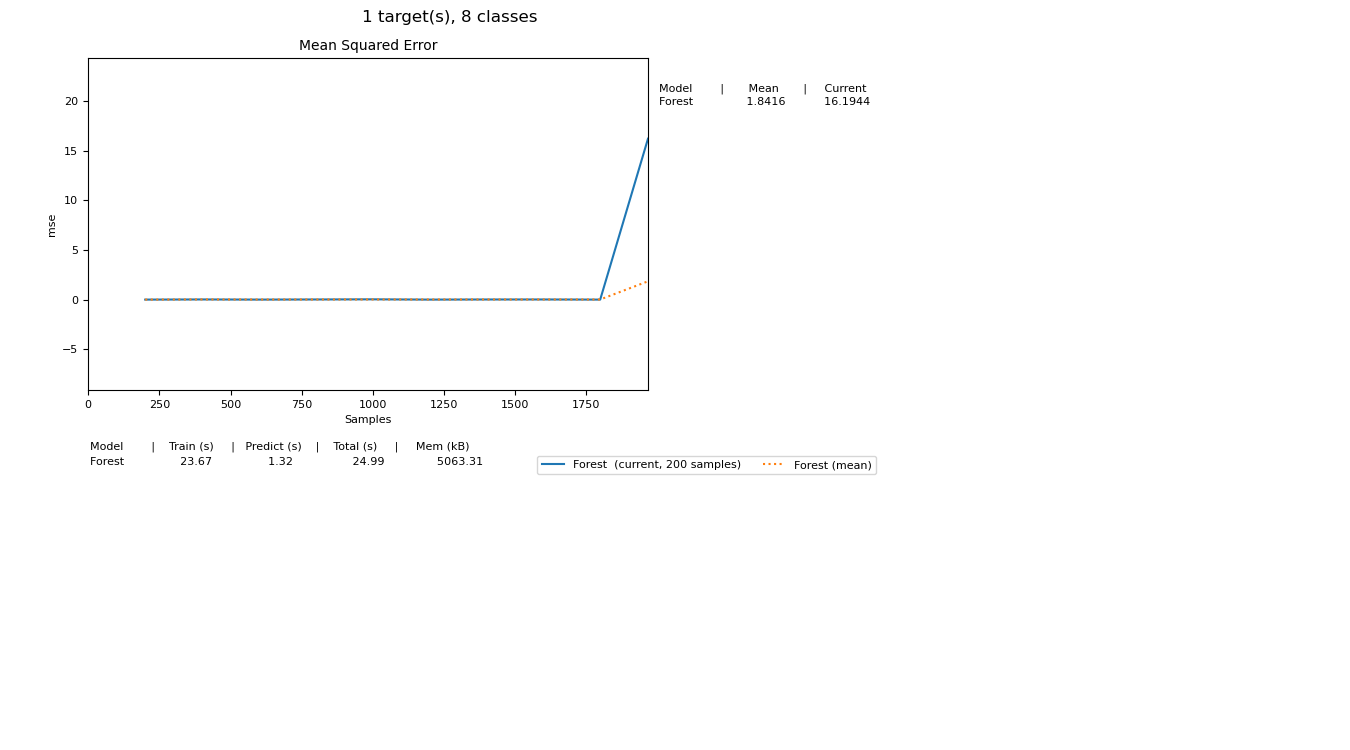

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 200 sample(s).
Evaluating...
 #################### [100%] [26.91s]
Processed samples: 1968
Mean performance:
Forest - MSE          : 1.8416
Forest - Training time (s)  : 23.67
Forest - Testing time  (s)  : 1.32
Forest - Total time    (s)  : 24.99
Forest - Size (kB)          : 5063.3115


<IPython.core.display.Javascript object>


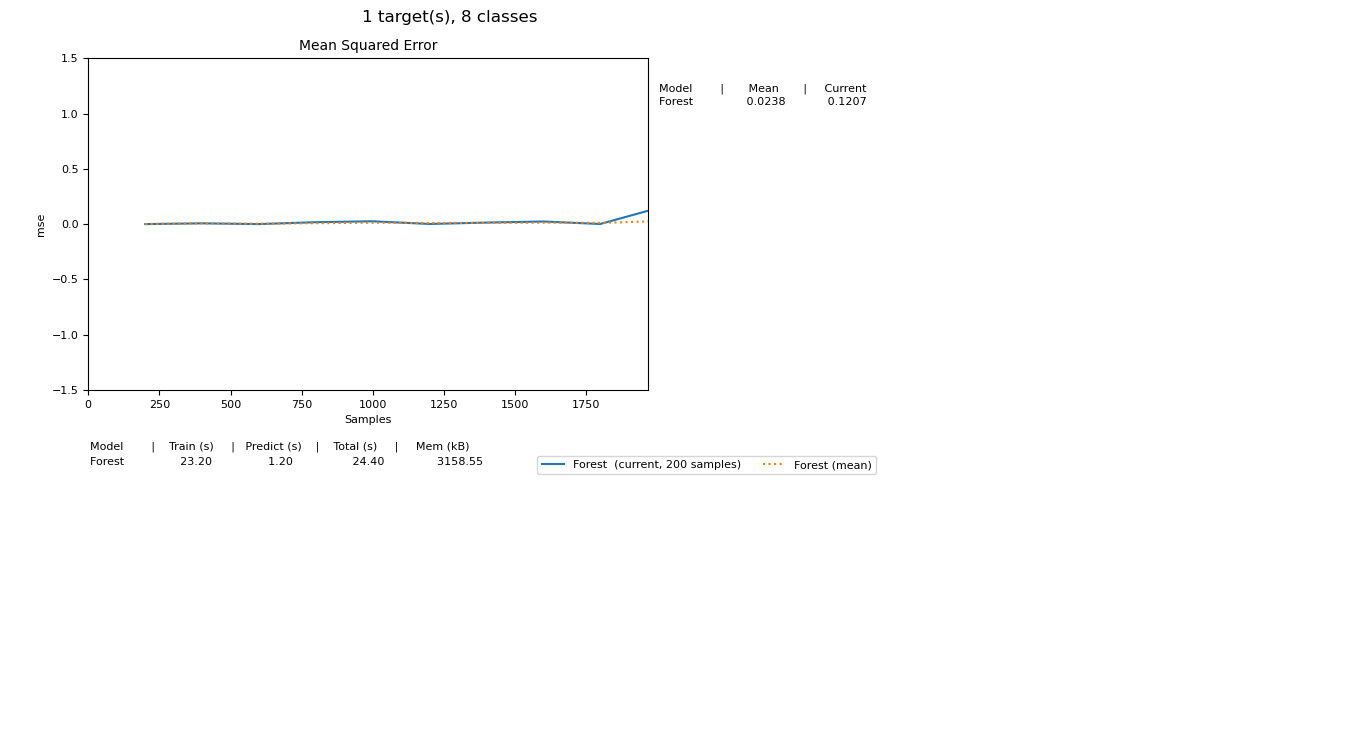

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 200 sample(s).
Evaluating...
 #################### [100%] [25.94s]
Processed samples: 1968
Mean performance:
Forest - MSE          : 0.0238
Forest - Training time (s)  : 23.20
Forest - Testing time  (s)  : 1.20
Forest - Total time    (s)  : 24.40
Forest - Size (kB)          : 3158.5498


<IPython.core.display.Javascript object>


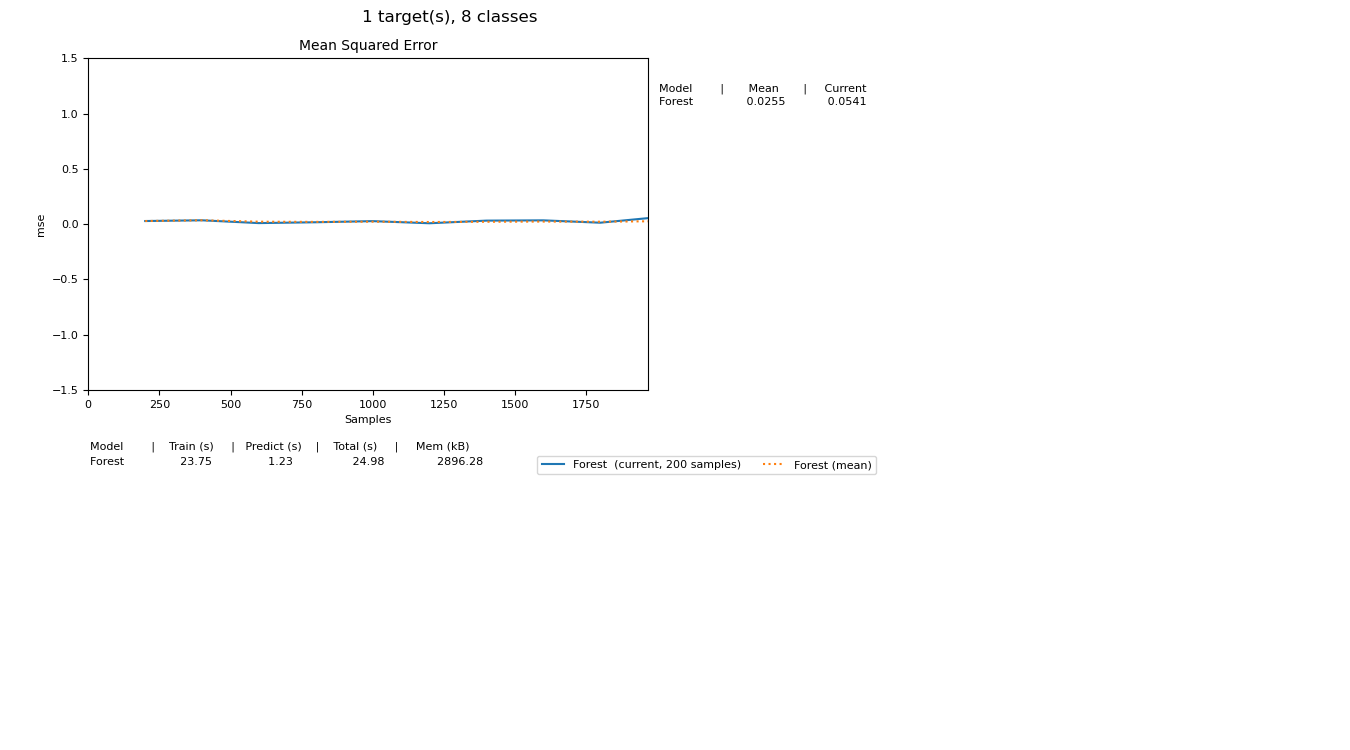

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 200 sample(s).
Evaluating...
 #################### [100%] [26.53s]
Processed samples: 1968
Mean performance:
Forest - MSE          : 0.0255
Forest - Training time (s)  : 23.75
Forest - Testing time  (s)  : 1.23
Forest - Total time    (s)  : 24.98
Forest - Size (kB)          : 2896.2803


In [35]:
concept_drift_Prequential(train_list_05s,test_list_05s,train_label_05s,test_label_05s,4,'all four','0.5s')

In [205]:
from skmultiflow.drift_detection import ADWIN
%matplotlib inline

def concept_drift_ADWIN(train_list_para,train_label_para,ch_index, ch, windows):
    names = ['RMS', 'Variance', 'Skewness',
            'Kurtosis', 'Shape factor', 'Crest factor']
    all_change=[]
    for i in range(6):
        name=names[i]
        bearing=train_list_para[i][:,:ch_index]
        feature_change_index=detect_col(bearing,name,windows)
        all_change.append(feature_change_index)
    return all_change

def detect_col(bearing,name,windows):
    #get row_length
    drift_index=[]
    for i in range(len(bearing[0])):
        temp=bearing[:,i]
        adwin = ADWIN()
        for j in range(len(bearing)):
            # Add stream items in ADWIN
            adwin.add_element(temp[j])
            if adwin.detected_change():
                print('Change detected for '+name+', '+windows+'(s) window, in channel ' +
                      str(i+1)+' at index {}'.format(j))
                drift_index.append(j)
    return drift_index
    

In [132]:
#use 1s window, and features from channel 1,2,3,4
cd_w1s=concept_drift_ADWIN(train_list,train_label_1s,4,'all four','1s');

Change detected for RMS, 1s(s) window, in channel 1 at index 927
Change detected for RMS, 1s(s) window, in channel 1 at index 959
Change detected for Shape factor, 1s(s) window, in channel 1 at index 863
Change detected for Shape factor, 1s(s) window, in channel 1 at index 895
Change detected for Crest factor, 1s(s) window, in channel 1 at index 959
Change detected for Crest factor, 1s(s) window, in channel 2 at index 927
Change detected for Crest factor, 1s(s) window, in channel 3 at index 959


In [133]:
#use 0.5s window, and features from channel 1,2,3,4
cd_w05s=concept_drift_ADWIN(train_list_05s,train_label_05s,4,'all four','0.5s');

Change detected for RMS, 0.5s(s) window, in channel 1 at index 1631
Change detected for RMS, 0.5s(s) window, in channel 1 at index 1695
Change detected for RMS, 0.5s(s) window, in channel 1 at index 1727
Change detected for RMS, 0.5s(s) window, in channel 1 at index 1791
Change detected for RMS, 0.5s(s) window, in channel 1 at index 1919
Change detected for Shape factor, 0.5s(s) window, in channel 1 at index 1471
Change detected for Shape factor, 0.5s(s) window, in channel 1 at index 1503
Change detected for Shape factor, 0.5s(s) window, in channel 1 at index 1535
Change detected for Shape factor, 0.5s(s) window, in channel 1 at index 1695
Change detected for Shape factor, 0.5s(s) window, in channel 1 at index 1791
Change detected for Crest factor, 0.5s(s) window, in channel 2 at index 1791
Change detected for Crest factor, 0.5s(s) window, in channel 2 at index 1887
Change detected for Crest factor, 0.5s(s) window, in channel 2 at index 1951
Change detected for Crest factor, 0.5s(s) wi

In [117]:
#use 0.1s window, and features from channel 1,2,3,4
cd_w01s=concept_drift_ADWIN(train_list_01s,train_label_01s,4,'all four','0.1s');

Change detected for RMS, 0.1s(s) window, in channel 1 at index 6399
Change detected for RMS, 0.1s(s) window, in channel 1 at index 6463
Change detected for RMS, 0.1s(s) window, in channel 1 at index 6655
Change detected for RMS, 0.1s(s) window, in channel 1 at index 6911
Change detected for RMS, 0.1s(s) window, in channel 1 at index 7071
Change detected for RMS, 0.1s(s) window, in channel 1 at index 7167
Change detected for RMS, 0.1s(s) window, in channel 1 at index 7231
Change detected for RMS, 0.1s(s) window, in channel 1 at index 7295
Change detected for RMS, 0.1s(s) window, in channel 1 at index 7359
Change detected for RMS, 0.1s(s) window, in channel 1 at index 7551
Change detected for RMS, 0.1s(s) window, in channel 1 at index 8063
Change detected for RMS, 0.1s(s) window, in channel 1 at index 8575
Change detected for RMS, 0.1s(s) window, in channel 1 at index 8703
Change detected for RMS, 0.1s(s) window, in channel 1 at index 8831
Change detected for RMS, 0.1s(s) window, in chan

In [201]:
def concept_drift_ADWIN_ano(train_list_para,train_label_para,ch_index, ch, windows):
    names = ['RMS', 'Variance', 'Skewness',
            'Kurtosis', 'Shape factor', 'Crest factor']
    all_change=[]
    for i in range(6):
        name=names[i]
        bearing=train_list_para[i][:,:ch_index]
        feature_change_index=detect_col(bearing,name,windows)
        all_change.append(feature_change_index)
    return all_change

def detect_col(bearing,name,windows):
    #get row_length
    drift_index=[]
    for i in range(len(bearing[0])):
        temp=bearing[:,i]
        adwin = ADWIN()
        for j in range(len(bearing)):
            # Add stream items in ADWIN
            adwin.add_element(temp[j])
            if adwin.detected_change():
                drift_index.append(j)
    return drift_index


def extract_ele(np_cd_ws):
    temp=[]
    for i in np_cd_ws:
        if len(i)!=0:
            for j in i:
                temp.append(j)
    return np.unique(np.array(temp))

In [177]:
cdw1s=extract_ele(cd_w1s)
cdw05s=extract_ele(cd_w05s)
cdw01s=extract_ele(cd_w01s)

In [188]:
#extract the valid index
def valid_index(train_list,train_label,cdws):
    temp=[]
    index=[]
    for i in list(range(len(train_list[0]))):
        if i not in cdws:
            index.append(i)
    for i in train_list:
        temp.append(i[index])
    return temp,np.array(train_label)[index]

In [189]:
new_train_1s_list,new_label_1s=valid_index(train_list,train_label_1s,cdw1s)
new_train_05s_list,new_label_05s=valid_index(train_list_05s,train_label_05s,cdw05s)
new_train_01s_list,new_label_01s=valid_index(train_list_01s,train_label_01s,cdw01s)

In [197]:
#use 1s window, and features from channel 1,2,3,4
def loop_remove_every_df(train_list_temp,train_label,ch_index, ch, windows):
    i=1
    while i!=0:
        cda=concept_drift_ADWIN_ano(train_list_temp,train_label,4,'all four','1s');
        cdae=extract_ele(cda)
        train_list_temp,train_label=valid_index(train_list_temp,train_label,cdae)
        if(len(cdae)==0):
            i=0
            return train_list_temp,train_label

In [192]:
no_df_train_1s,no_df_label_1s=loop_remove_every_df(train_list,train_label_1s,4,'all four','1s')

In [198]:
no_df_train_05s,no_df_label_05s=loop_remove_every_df(train_list_05s,train_label_05s,4,'all four','05s')

In [206]:
#check whether the concept drift is clear
"No more output means the data that would cause concept drift is clear in data"

#use 1s window, and features from channel 1,2,3,4
concept_drift_ADWIN(no_df_train_1s,no_df_label_1s,4,'all four','1s');
#use 0.5s window, and features from channel 1,2,3,4
concept_drift_ADWIN(no_df_train_05s,no_df_label_05s,4,'all four','1s');


The score of model training score is  0.9405242193379868
Experiment with 1s window, and feature RMS from channel all four, get MSE score is 61.80358701298701
************************************************************************************************
The score of model training score is  0.9378915857495431
Experiment with 1s window, and feature Variance from channel all four, get MSE score is 59.86750278293135
************************************************************************************************
The score of model training score is  0.6403433512113123
Experiment with 1s window, and feature Skewness from channel all four, get MSE score is 73.90671396756535
************************************************************************************************
The score of model training score is  0.8212377707665703
Experiment with 1s window, and feature Kurtosis from channel all four, get MSE score is 60.19464536050556
**************************************************************

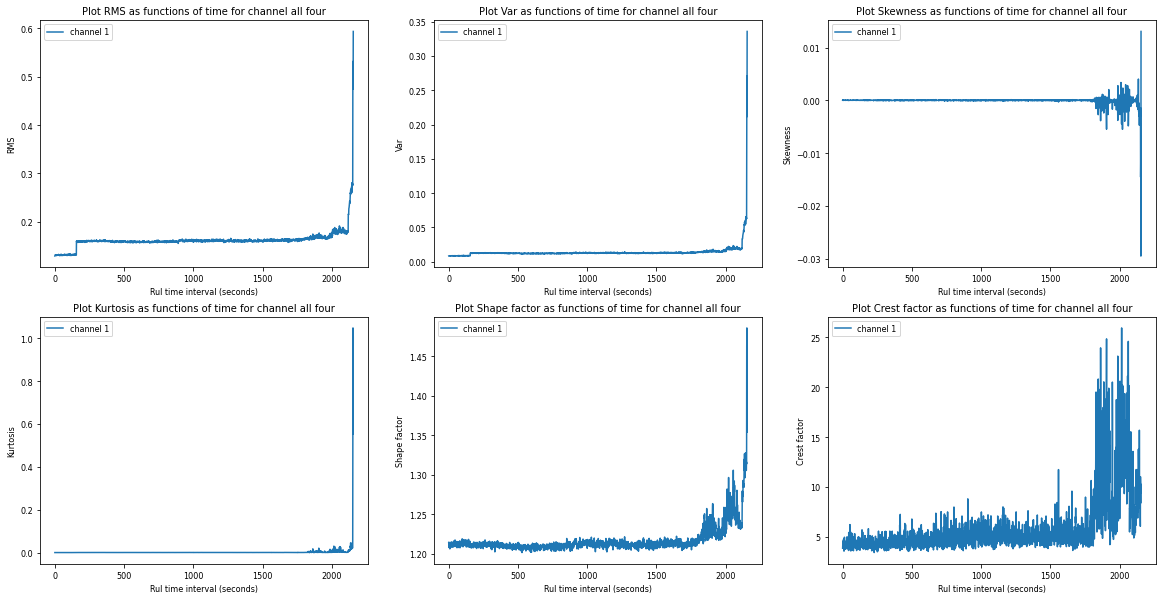

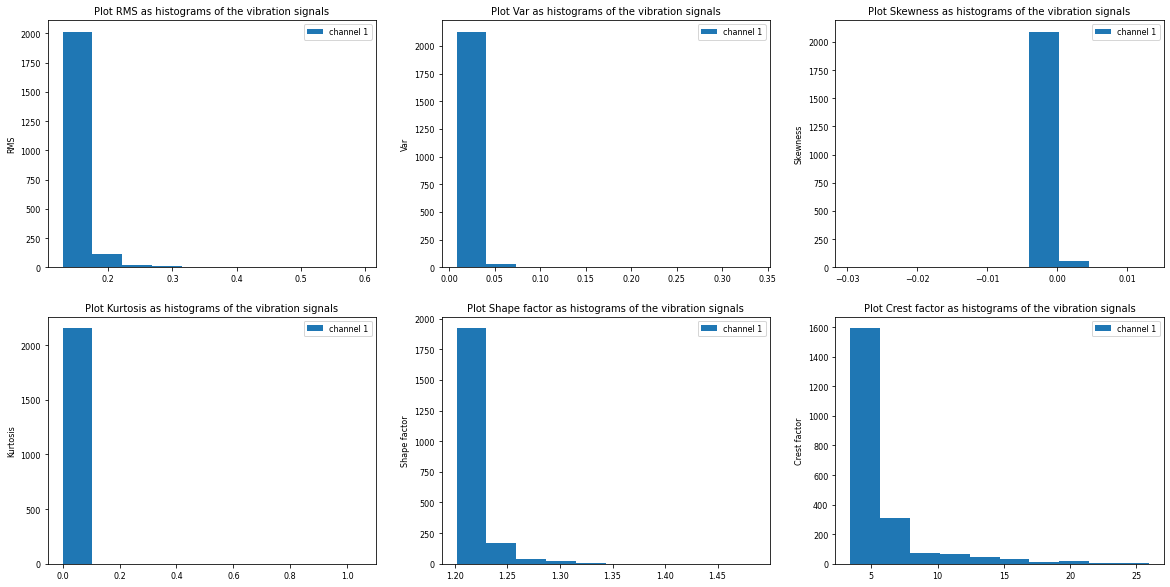

[61.80358701298701,
 59.86750278293135,
 73.90671396756535,
 60.19464536050556,
 98.48197333024117,
 94.56986071428572]

In [209]:
"""Using new input data set the 1s window, and features from channel 1"""
model_build(no_df_train_1s,test_list,no_df_label_1s,test_label_1s,1,'all four','1s')

The score of model training score is  0.9881141893584454
Experiment with 1s window, and feature RMS from channel all four, get MSE score is 58.045714285714276
************************************************************************************************
The score of model training score is  0.9881378947091098
Experiment with 1s window, and feature Variance from channel all four, get MSE score is 57.124099721706855
************************************************************************************************
The score of model training score is  0.916844984399942
Experiment with 1s window, and feature Skewness from channel all four, get MSE score is 78.04418770871985
************************************************************************************************
The score of model training score is  0.9807306435326271
Experiment with 1s window, and feature Kurtosis from channel all four, get MSE score is 57.09628849721707
*************************************************************

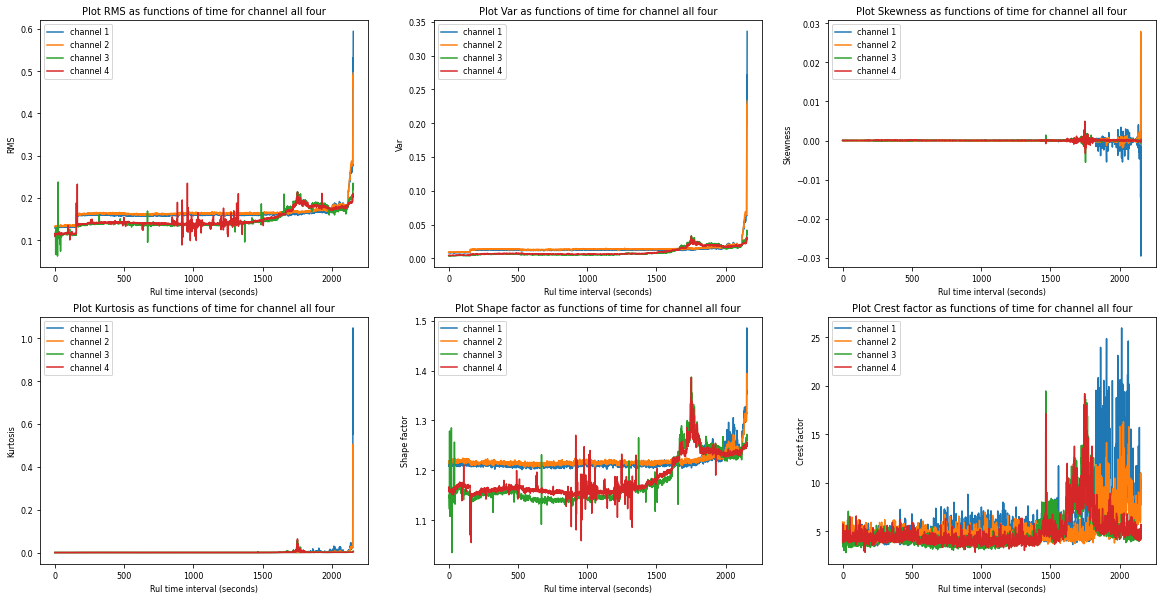

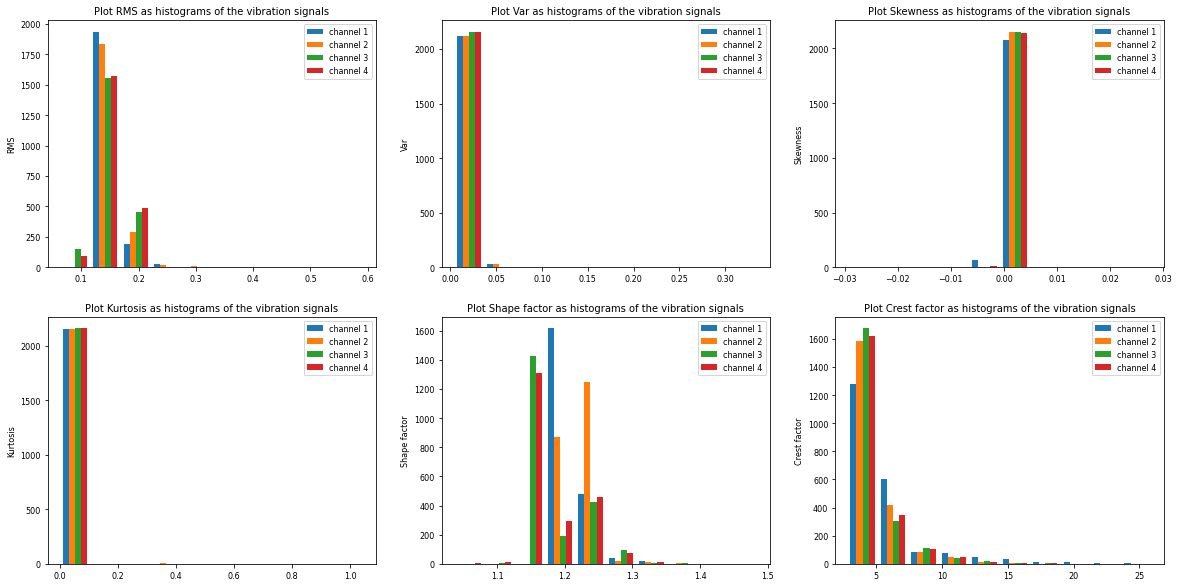

[58.045714285714276,
 57.124099721706855,
 78.04418770871985,
 57.09628849721707,
 102.54627629870129,
 91.39147374768089]

In [210]:
"""Using new input data set the 1s window, and features from channel 1,2,3,4"""
model_build(no_df_train_1s,test_list,no_df_label_1s,test_label_1s,4,'all four','1s')

The score of model training score is  0.9094424703921234
Experiment with 1s window, and feature RMS from channel all four, get MSE score is 67.41233766233766
************************************************************************************************
The score of model training score is  0.8756651682200837
Experiment with 1s window, and feature Variance from channel all four, get MSE score is 67.04338253710576
************************************************************************************************
The score of model training score is  0.45318429586311626
Experiment with 1s window, and feature Skewness from channel all four, get MSE score is 81.86857158738987
************************************************************************************************
The score of model training score is  0.6616612584996452
Experiment with 1s window, and feature Kurtosis from channel all four, get MSE score is 66.93712602047258
*************************************************************

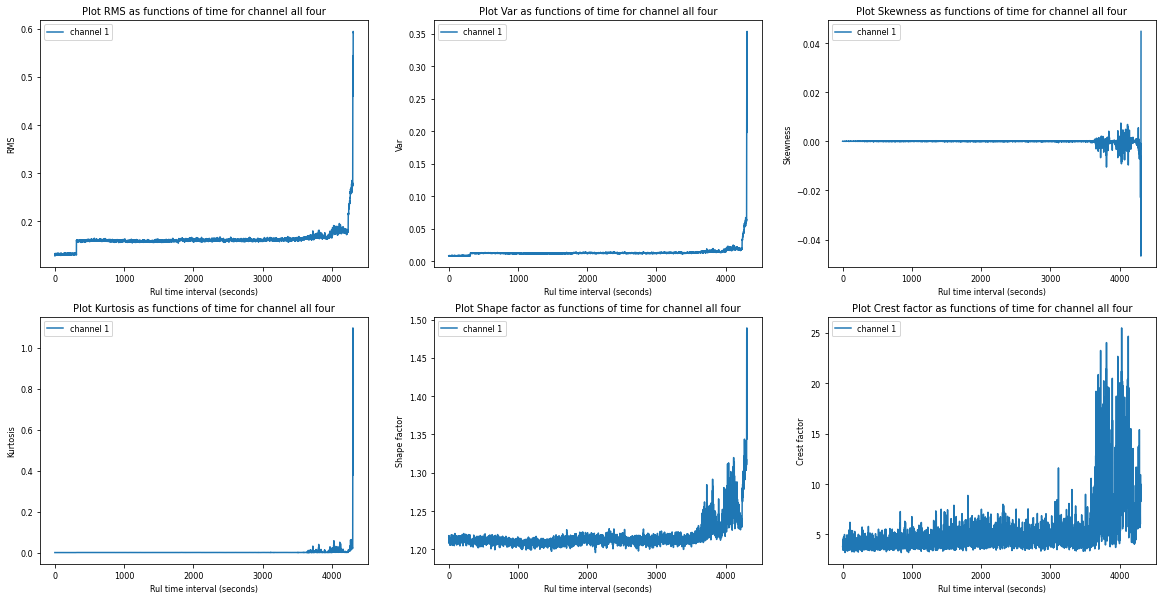

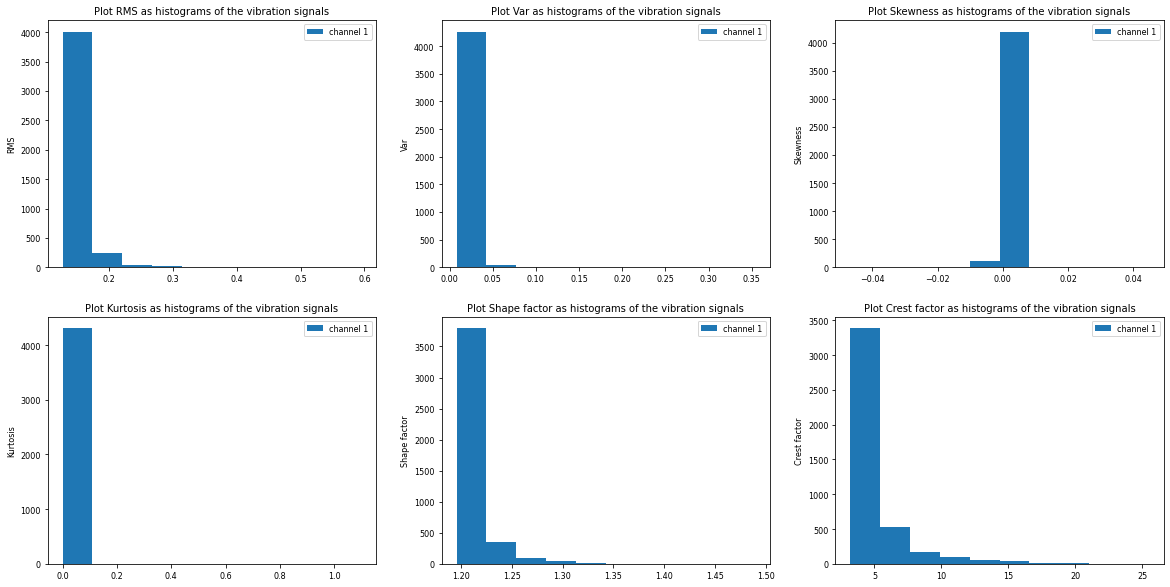

[67.41233766233766,
 67.04338253710576,
 81.86857158738987,
 66.93712602047258,
 91.32301502600623,
 101.85742030959794]

In [211]:
"""Using new input data set the 1s window, and features from channel 1"""
model_build(no_df_train_05s,test_list_05s,no_df_label_05s,test_label_05s,1,'all four','1s')

The score of model training score is  0.9737982293720151
Experiment with 1s window, and feature RMS from channel all four, get MSE score is 67.41233766233766
************************************************************************************************
The score of model training score is  0.9736447451888336
Experiment with 1s window, and feature Variance from channel all four, get MSE score is 67.02011006493507
************************************************************************************************
The score of model training score is  0.8814178851952614
Experiment with 1s window, and feature Skewness from channel all four, get MSE score is 87.4096160018553
************************************************************************************************
The score of model training score is  0.9604837700793656
Experiment with 1s window, and feature Kurtosis from channel all four, get MSE score is 66.28724749536178
***************************************************************

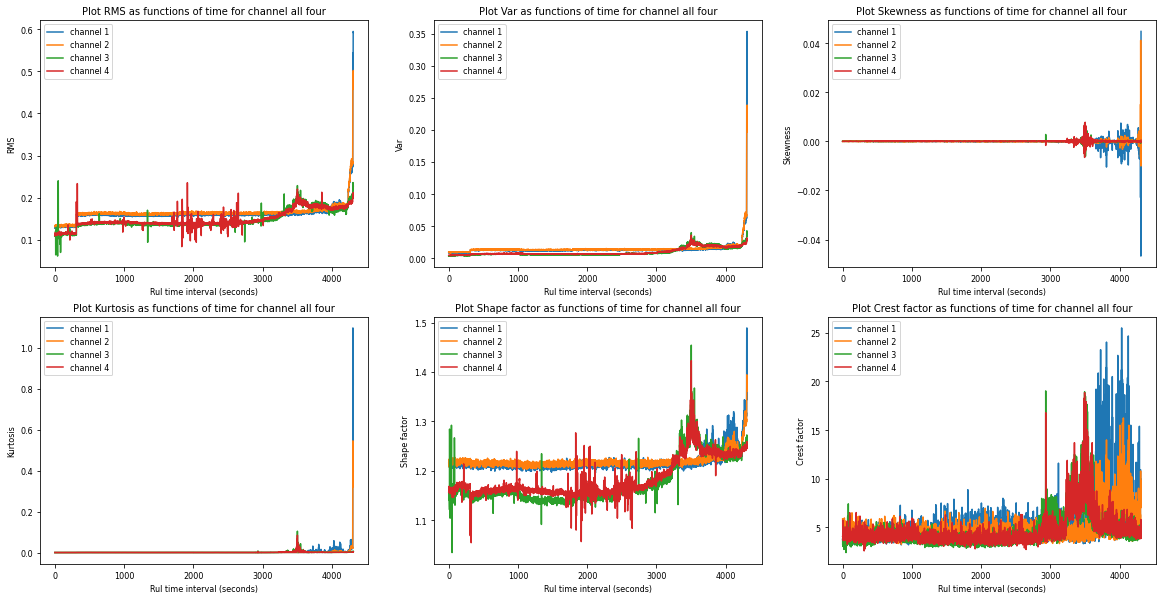

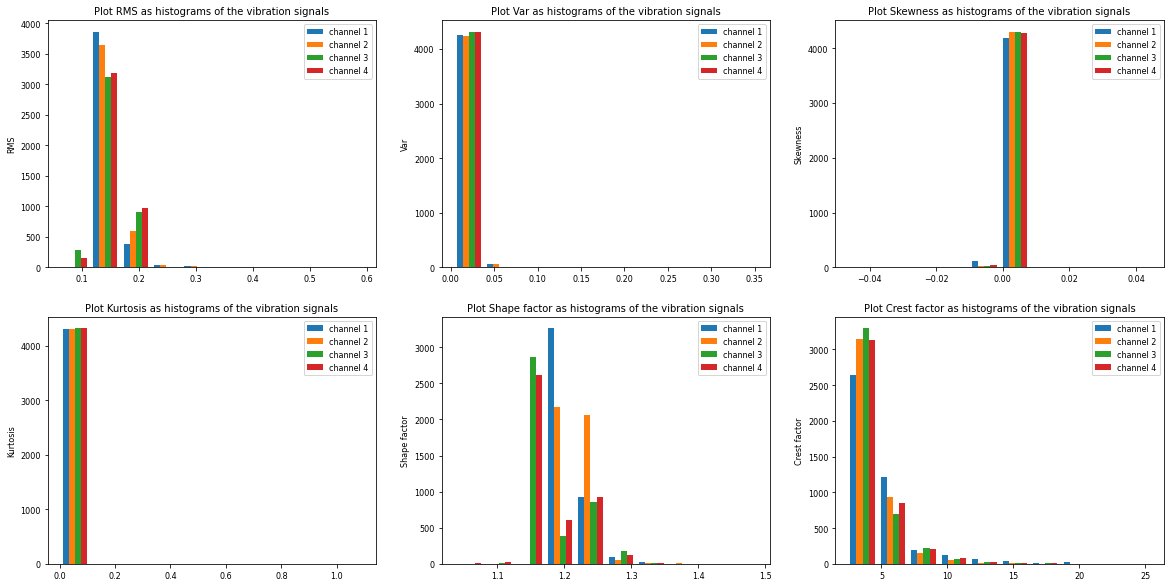

[67.41233766233766,
 67.02011006493507,
 87.4096160018553,
 66.28724749536178,
 100.70150830241188,
 96.65130359461968]

In [212]:
"""Using new input data set the 1s window, and features from channel 1,2,3,4"""
model_build(no_df_train_05s,test_list_05s,no_df_label_05s,test_label_05s,4,'all four','1s')